In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [ ]:
df_train = pd.read_csv('X_train_Hi5.csv')

In [3]:
df_train.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,5.698947,45.725106,1454.0,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,5.464933,46.210734,1051.0,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,5.085060,45.812828,69266.0,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,5.802841,46.366049,39286.0,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,5.377265,46.080989,1273.0,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low


In [4]:
df_test= pd.read_csv('X_test_Hi5.csv')
df_test.head()

c:\Users\ayraa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_volume_obtention_mode_label_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const
0,2331795,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,NaN,NaN,NaN,NaN,0.0,11.8,992.0,25250,2.9,16.2
1,2331796,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,NaN,NaN,NaN,NaN,0.0,0.6,1786.0,24660,44.5,11
2,2331797,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,NaN,NaN,NaN,NaN,0.0,0,8085.0,24890,8.4,7.8
3,2331798,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,NaN,NaN,NaN,NaN,0.0,1.5,2838.0,39700,2.4,5.2
4,2331799,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,NaN,NaN,NaN,NaN,0.0,0.2,1352.0,26180,21.5,9.8


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830316 entries, 0 to 2830315
Columns: 136 entries, row_index to piezo_groundwater_level_category
dtypes: float64(90), int64(6), object(40)
memory usage: 2.9+ GB


# Exploratory Data Analysis

## Exploring Train Data

In [6]:
df_train.describe()

,row_index,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_continuity_code,piezo_producer_code,meteo_id,meteo_latitude,meteo_longitude,...,prelev_volume_1,prelev_longitude_1,prelev_latitude_1,prelev_commune_code_insee_1,prelev_volume_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_pop_commune
count,2.830316e+06,2.651254e+06,2.830316e+06,2.830316e+06,2.830316e+06,2.830316e+06,2.684494e+06,2.830316e+06,2.830316e+06,2.830316e+06,...,2.276818e+06,2.276818e+06,2.276818e+06,2.276818e+06,2.274386e+06,2.274386e+06,2.274386e+06,2.274386e+06,2.451155e+06,2.803496e+06
mean,1.557090e+06,8.583075e+01,1.469380e+02,2.216656e+00,4.641149e+01,1.999084e+00,5.593563e+12,3.748885e+07,2.192156e+00,4.641773e+01,...,6.877537e+08,1.983427e+00,4.653565e+01,4.527227e+04,2.679338e+08,1.985188e+00,4.653193e+01,4.533341e+04,2.019479e+08,6.974255e+03
std,9.572108e+05,2.444317e+02,1.924840e+02,2.722361e+00,2.174955e+00,3.024831e-02,1.128998e+13,2.081867e+07,2.680965e+00,2.138630e+00,...,3.896522e+09,2.636448e+00,2.103468e+00,2.460396e+04,2.094541e+09,2.636332e+00,2.100684e+00,2.463875e+04,1.291700e+09,3.244462e+04
min,0.000000e+00,0.000000e+00,-9.990000e+02,-4.657129e+00,4.139973e+01,1.000000e+00,5.300000e+01,1.027003e+06,-4.771667e+00,4.238467e+01,...,0.000000e+00,-4.487265e+00,4.240779e+01,1.010000e+03,1.359000e+03,-4.731051e+00,4.240779e+01,1.027000e+03,0.000000e+00,6.000000e+00
25%,7.442368e+05,1.647000e+01,4.100000e+01,-1.055842e-01,4.449081e+01,2.000000e+00,2.910000e+02,1.926400e+07,-1.520000e-01,4.453267e+01,...,8.485280e+05,-2.640854e-01,4.468668e+01,2.608500e+04,6.401710e+05,-2.671679e-01,4.468668e+01,2.606300e+04,7.706340e+06,4.790000e+02
50%,1.488348e+06,3.800000e+01,1.070700e+02,1.900215e+00,4.638400e+01,2.000000e+00,3.000000e+02,3.420900e+07,1.903167e+00,4.635517e+01,...,2.323468e+06,1.600917e+00,4.660865e+01,4.129500e+04,1.413261e+06,1.581543e+00,4.662493e+01,4.110400e+04,1.715963e+07,1.229000e+03
75%,2.230523e+06,8.000000e+01,1.860000e+02,4.197586e+00,4.820457e+01,2.000000e+00,1.219000e+03,5.246900e+07,4.168000e+00,4.818800e+01,...,1.573000e+07,3.712284e+00,4.831960e+01,6.715200e+04,5.670317e+06,3.712284e+00,4.830184e+01,6.748200e+04,4.051962e+07,3.718000e+03
max,3.294084e+06,5.233400e+03,2.150000e+03,9.519890e+00,5.097109e+01,2.000000e+00,4.930211e+13,9.558000e+07,8.145500e+00,5.083383e+01,...,3.763868e+10,8.087510e+00,5.094838e+01,9.517000e+04,3.596148e+10,8.097536e+00,5.086488e+01,9.505200e+04,2.566101e+10,8.730760e+05


## Missing Value Analysis

C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3220560107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="viridis")


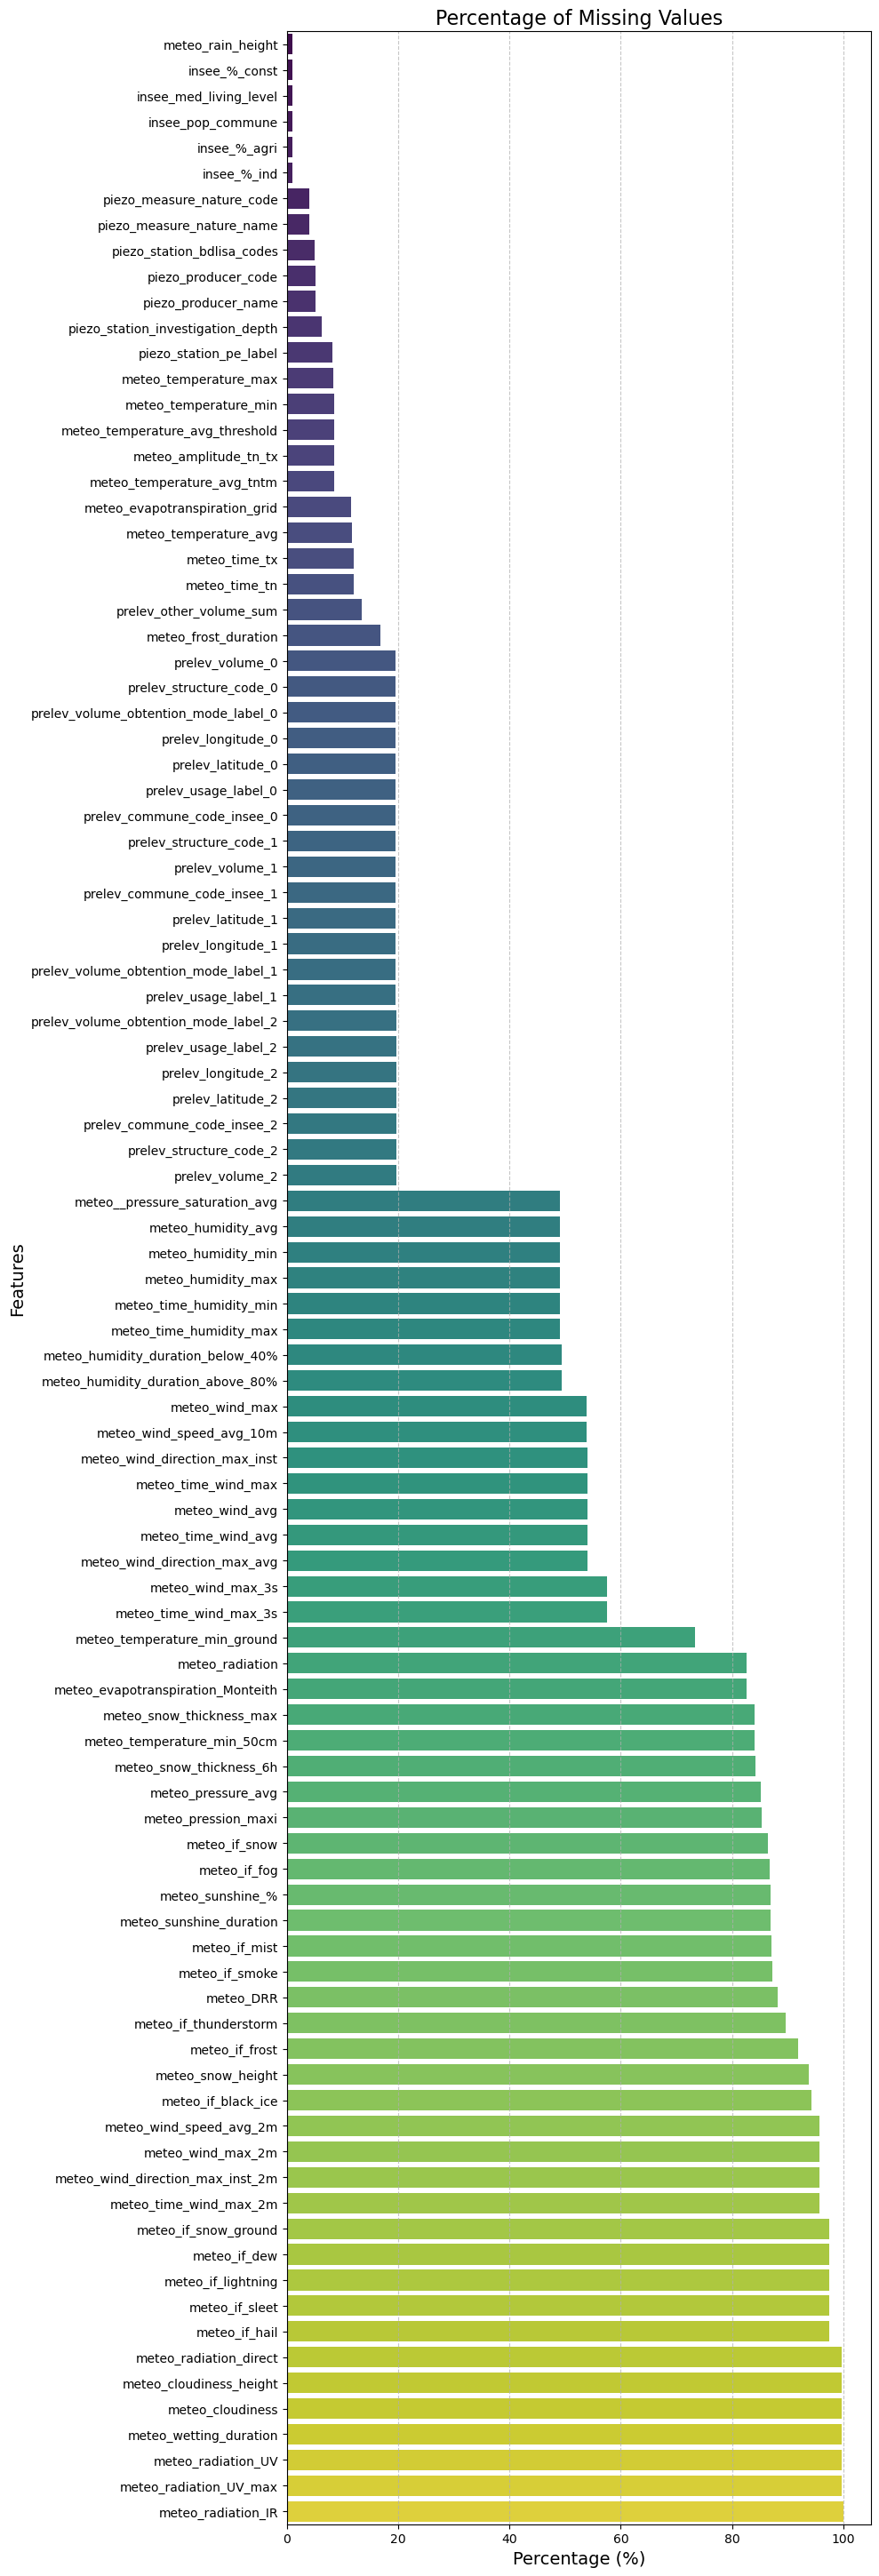

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values
missing = df_train.isnull().mean() * 100
missing = missing[missing > 0].sort_values()

# Plot: Horizontal Bar Chart with Rotated Y-Labels
plt.figure(figsize=(10, max(len(missing) * 0.3, 6)))  # Dynamically adjust height
sns.barplot(x=missing.values, y=missing.index, palette="viridis")
plt.title('Percentage of Missing Values', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate labels for better visibility
plt.yticks(rotation=0, fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis of Missing Values and Business Insights for Predicting Groundwater Level Categories

The plot highlights the percentage of missing values across various meteorological features that are part of the dataset. The features have different rates of missing data, with some like `meteo_pressure_saturation_avg` and `meteo_humidity_avg` having very few missing values, while others like `meteo_radiation_IR` and `meteo_cloudiness_height` have higher percentages of missing data. Observing this trend, it becomes evident that not all features are equally reliable in terms of data availability.

When considering the target variable, `piezo_groundwater_level_category`, which classifies groundwater levels into five categories (High, Very High, Low, Very Low, and Average), the completeness of the meteorological features can have a significant impact on the prediction quality. Features with high rates of missing data, such as radiation and cloud-related variables, may require careful handling. Imputation strategies or feature selection might be necessary to ensure that missing data does not lead to biased predictions or degraded model performance. On the other hand, highly complete features like humidity and pressure data will likely serve as robust inputs for predicting groundwater levels.

From a business perspective, predicting groundwater level categories is critical for water resource management in France. Accurate predictions can support agricultural planning, urban water supply management, and disaster mitigation efforts, such as preparing for droughts or floods. High and Very High groundwater levels might indicate a risk of waterlogging or floods, which could impact infrastructure and agriculture. On the other hand, Low and Very Low levels could signal impending drought conditions, stressing the importance of water conservation strategies.

The features presented in the dataset have strong potential relevance to groundwater levels. For instance, wind speed and direction, along with humidity and temperature measures, directly influence evaporation and precipitation patterns, which in turn impact groundwater recharge. Snow thickness and radiation variables could also be critical in regions where snowmelt is a significant contributor to groundwater levels. However, the high percentage of missing values in some of these features poses a challenge. Effective predictive models will need to account for these gaps by using imputation techniques or focusing on the more reliable features.

## Some Numerical Features

Text(0.5, 0.98, 'Histograms for Numerical Features')

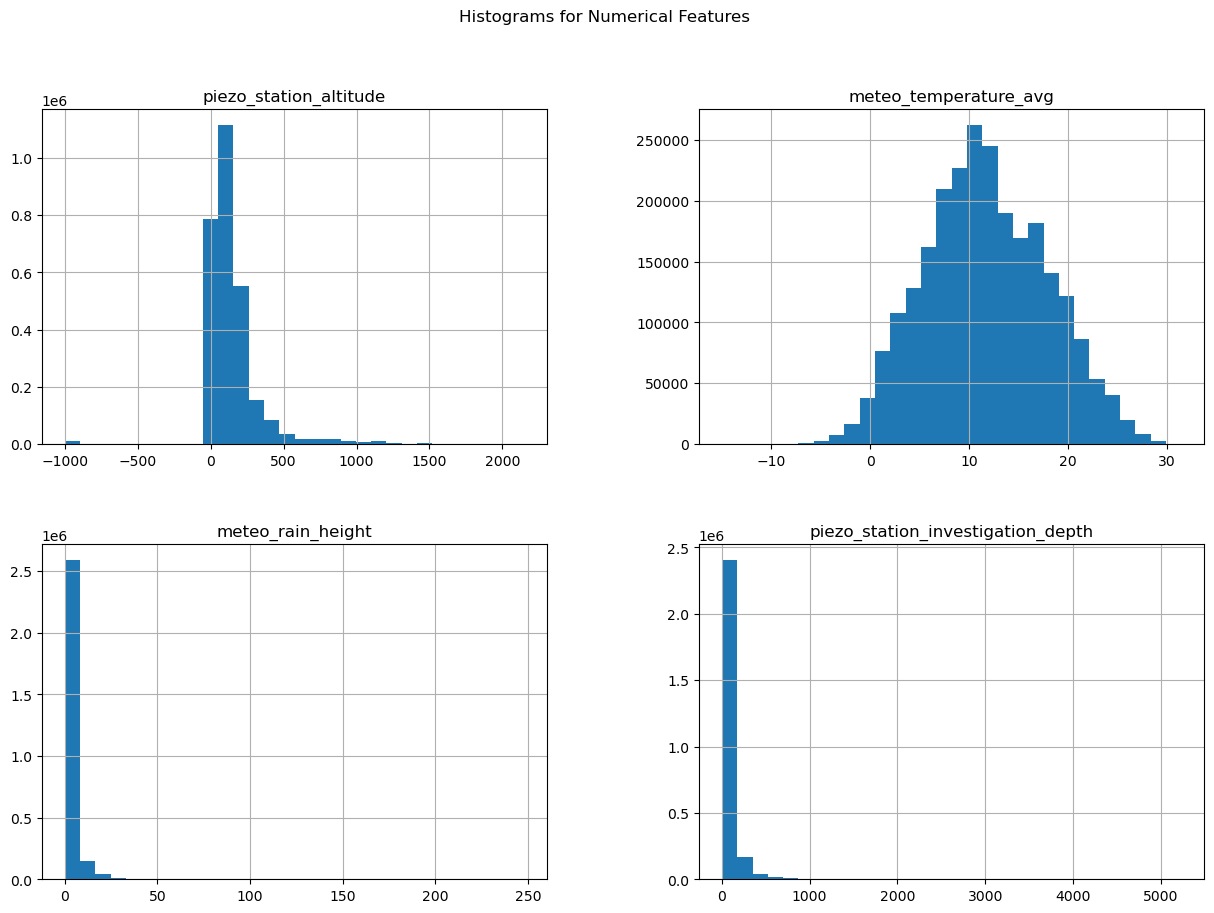

In [8]:
num_features = ['piezo_station_altitude', 'meteo_temperature_avg', 'meteo_rain_height', 'piezo_station_investigation_depth']
df_train[num_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features')

### Analysis of Numerical Feature Distributions


#### 1. **Piezo Station Altitude**
The distribution of the `piezo_station_altitude` feature reveals a skewed pattern, with most of the stations located at altitudes close to sea level. The bulk of the data lies within a relatively narrow range between 0 and 500 meters, suggesting that groundwater monitoring primarily occurs in lowland areas. A small number of stations exhibit altitudes above 1000 meters, which could indicate mountain or highland regions. The presence of negative altitudes may reflect inaccuracies in data or unique geological formations, such as below-sea-level terrains.

#### 2. **Meteo Temperature Average**
The `meteo_temperature_avg` feature demonstrates a near-normal distribution centered around a mean temperature between 10 and 15 degrees Celsius. This indicates a temperate climate typical of much of France, with seasonal variations driving the range of temperatures. The bell curve suggests that data quality for this feature is consistent, and it can effectively capture the average weather patterns over time.

#### 3. **Meteo Rain Height**
The distribution of `meteo_rain_height` is highly skewed, with most values clustered near 0. This suggests that there are many dry periods or locations with minimal rainfall, interspersed with occasional significant precipitation events. Outliers, where rain height exceeds 50 or even 100 millimeters, likely correspond to heavy rainfall events. This feature is critical for understanding the recharge potential of groundwater resources.

#### 4. **Piezo Station Investigation Depth**
The `piezo_station_investigation_depth` feature is similarly skewed, with the majority of observations clustered below 500 meters. This reflects the general depth range of piezometers used for groundwater monitoring. A small number of deeper investigations, exceeding 1000 meters, may relate to specific geological studies or aquifers located deep underground. The clustering at shallow depths suggests that most monitored aquifers are relatively close to the surface, which could indicate accessibility and usability for water extraction.

### General Observations
- **Skewed Distributions**: Both `piezo_station_altitude` and `meteo_rain_height` exhibit skewed distributions, which might necessitate transformations (e.g., log transformations) during modeling to improve predictive performance.
- **Normal Distribution**: The `meteo_temperature_avg` follows a normal distribution, making it an ideal candidate for statistical analyses without requiring preprocessing.
- **Impact on Groundwater Levels**: The variability in these features likely impacts groundwater levels. For instance, stations at higher altitudes or with greater investigation depths might experience different groundwater dynamics compared to lowland areas. Similarly, temperature and rainfall patterns directly influence aquifer recharge and depletion cycles.

### Business Insights
- **Targeted Monitoring**: The insights derived from the altitude and depth features can help prioritize areas for groundwater conservation. For example, stations with significant depths may require focused efforts due to their potential vulnerability to depletion.
- **Rainfall Patterns**: Areas experiencing heavy rainfall outliers are critical for understanding recharge mechanisms and identifying potential flood risks.
- **Climate Impact**: The normal distribution of average temperatures indicates stability in the dataset, but it would be essential to analyze temporal trends to assess climate change's long-term effects on groundwater availability.

These distributions provide essential information to refine predictive models for groundwater level categories and inform sustainable groundwater management strategies across France.

## Some Categorical Features

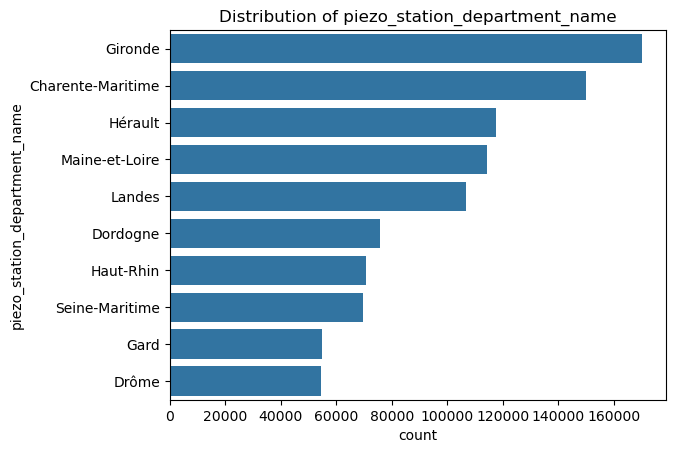

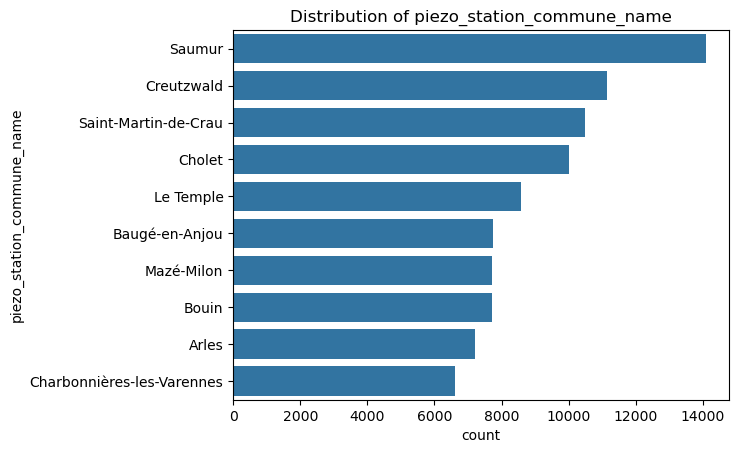

In [9]:
cat_features = ['piezo_station_department_name', 'piezo_station_commune_name']
for feature in cat_features:
    sns.countplot(y=feature, data=df_train, order=df_train[feature].value_counts().index[:10])
    plt.title(f'Distribution of {feature}')
    plt.show()

### Analysis of Categorical Feature Distributions

The above bar plots show the distributions of two categorical features: `piezo_station_department_name` and `piezo_station_commune_name`. Let’s analyze them in detail:

#### **1. Piezo Station Department Name**
The `piezo_station_department_name` feature exhibits a distinct distribution, with the department of **Gironde** having the highest count of piezometric stations, followed closely by **Charente-Maritime** and **Hérault**. Departments like **Drôme** and **Gard** appear at the lower end of the distribution. This suggests that certain regions in France are more intensively monitored for groundwater levels. The higher station counts in Gironde and Charente-Maritime may reflect their significance in terms of water resource management, possibly due to high agricultural activities, urban demands, or historical water scarcity issues.

The variations in departmental distribution indicate uneven geographic coverage, which could affect the representativeness of groundwater monitoring. Departments with fewer stations might require additional resources to ensure comprehensive groundwater management.

#### **2. Piezo Station Commune Name**
For the `piezo_station_commune_name` feature, the commune of **Saumur** stands out with the highest number of stations, followed by **Creutzwald** and **Saint-Martin-de-Crau**. Other communes like **Cholet** and **Le Temple** also show significant counts. This distribution reflects localized monitoring priorities, potentially driven by the geological importance of certain areas, higher water demands, or specific aquifer characteristics.

The high station count in Saumur may indicate a critical water resource hub or an area with diverse hydrogeological challenges. Meanwhile, communes with lower station counts, such as **Charbonnières-les-Varennes**, may reflect smaller population centers or less intensive groundwater use.

---

### General Observations

The unequal distribution of groundwater monitoring infrastructure across departments and communes in France reveals significant geographic disparities. While areas like Gironde and Saumur are heavily monitored, others are less represented, potentially leading to gaps in groundwater management and policy-making. This unevenness could be due to economic factors, historical water use, or varying environmental challenges, and it may introduce bias into predictive models. Addressing these disparities through strategic resource allocation or resampling in data processing could lead to more accurate and equitable groundwater-level predictions.

Additionally, regions with high station counts are likely significant hubs for groundwater dynamics. These areas can serve as critical case studies for understanding groundwater challenges, and insights from these regions can be applied to similar but under-monitored areas. Understanding why certain communes are monitored more closely could help in identifying their unique hydrological or economic importance.

---

### Business Insights

From a business perspective, departments and communes with fewer monitoring stations present opportunities for future infrastructure investments. Prioritizing under-monitored regions ensures a more comprehensive groundwater management framework and better predictive modeling for groundwater levels. Additionally, leveraging advanced technologies like automated sensors or remote monitoring systems could efficiently bridge monitoring gaps in these areas.

Regions like Gironde, Saumur, and Charente-Maritime, with high station counts, are key areas for strategic groundwater management. Targeting these areas with robust policies can enhance water resource sustainability. Furthermore, these regions could be prioritized for pilot projects or technological implementations due to their significant contribution to groundwater monitoring datasets. By addressing localized needs with tailored solutions, France can ensure long-term water security and improved resource management.

## BoxPlot for Some Numerical Features vs Target Variable

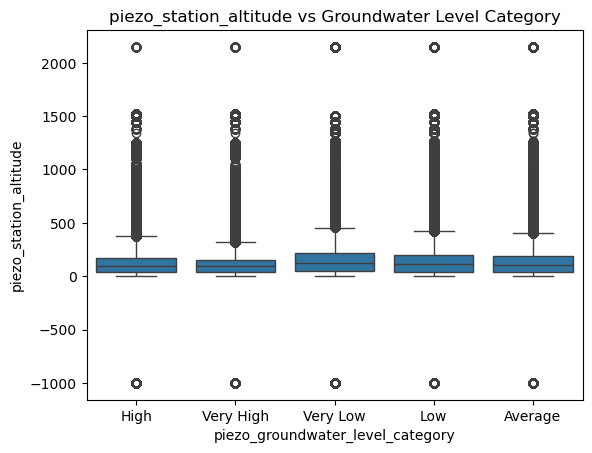

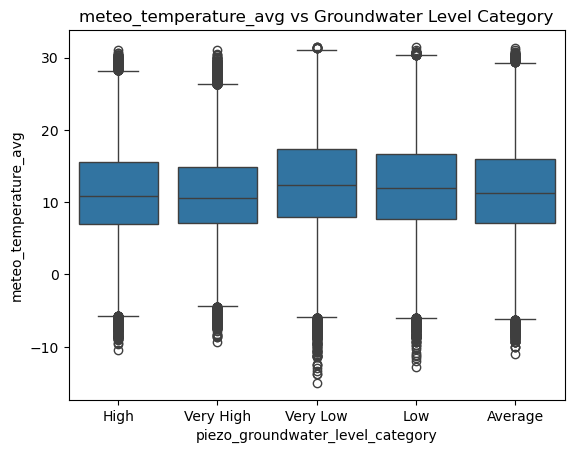

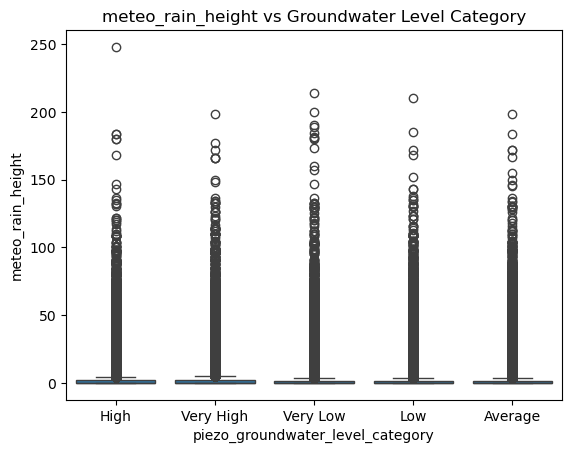

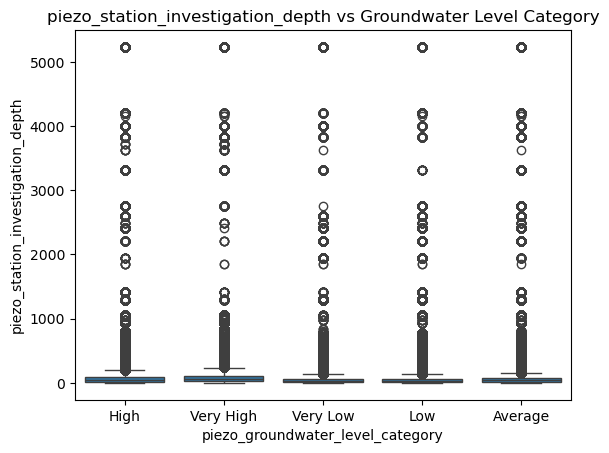

In [10]:
for feature in num_features:
    sns.boxplot(x='piezo_groundwater_level_category', y=feature, data=df_train)
    plt.title(f'{feature} vs Groundwater Level Category')
    plt.show()

The first two box plots offer insights into how **station altitude** and **average temperature** relate to groundwater level categories across France.

### 1. **Piezo Station Altitude vs. Groundwater Level Category**
The first box plot depicts the distribution of station altitudes across different groundwater level categories. While there is a wide range of altitudes from below sea level to over 2000 meters, the majority of groundwater level observations cluster between **0 and 500 meters**. Interestingly, the median altitude remains relatively consistent across all groundwater categories, indicating that **altitude alone may not be a strong determinant** of groundwater levels. However, at higher altitudes, the variability and the presence of outliers increase, especially for *High* and *Very High* groundwater levels. This may suggest that localized factors such as aquifer characteristics, geology, and precipitation patterns play a more significant role than altitude alone.

### 2. **Meteo Temperature Average vs. Groundwater Level Category**
The second box plot illustrates the relationship between average temperature and groundwater level categories. There is a clear trend where **lower groundwater levels (Very Low, Low)** correspond to higher temperatures, while **higher groundwater levels (High, Very High)** align with lower average temperatures. This is expected since **higher temperatures often lead to increased evaporation rates**, reducing groundwater recharge and increasing water stress. Conversely, regions with lower temperatures may experience reduced evaporation and higher precipitation, leading to more consistent groundwater replenishment. The median temperature across all categories is around **12-15°C**, with *Very Low* groundwater levels showing slightly higher medians, suggesting that temperature can significantly impact water availability.

### Business Insights:
These relationships highlight that **groundwater management strategies should account for both altitude and temperature**. In **higher-altitude areas**, local aquifer properties and recharge rates must be carefully monitored to avoid water stress. Additionally, **temperature-driven water scarcity** in low groundwater level regions suggests the need for adaptive strategies such as **irrigation management**, **drought-resistant crops**, and **rainwater harvesting**. Integrating altitude and temperature data into groundwater prediction models can enhance forecasting accuracy and support sustainable water resource management across varying climatic and geographic regions in France.

## Spatial Analysis

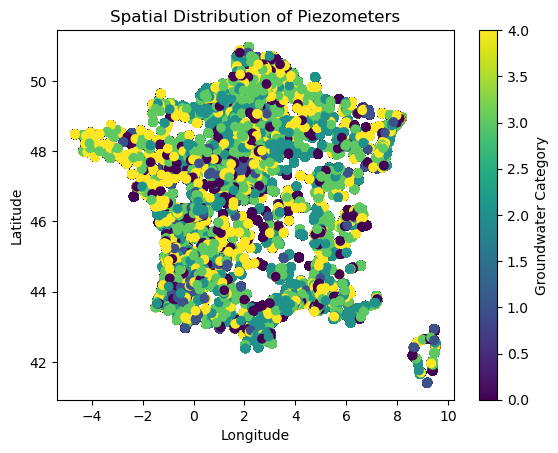

In [11]:
plt.scatter(df_train['piezo_station_longitude'], df_train['piezo_station_latitude'], 
            c=df_train['piezo_groundwater_level_category'].factorize()[0], cmap='viridis')
plt.title('Spatial Distribution of Piezometers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Groundwater Category')

The spatial distribution of groundwater levels across France reveals significant regional variability influenced by climatic, geological, and hydrological factors. **Northern and northeastern France**, including regions like **Alsace** and **Grand Est**, display higher groundwater levels due to their proximity to aquifer-rich sedimentary basins and consistent rainfall. Similarly, **central France** benefits from moderate to high groundwater levels, particularly in the **Loire Valley** and **Burgundy**, where karst systems and moderate precipitation support groundwater recharge.

In contrast, **southern and southwestern France**, particularly regions like **Occitanie** and **Provence-Alpes-Côte d’Azur**, face lower groundwater levels. The **Mediterranean climate** in these areas, characterized by hot, dry summers and limited rainfall, leads to reduced groundwater recharge and heightened water scarcity. These regions are also heavily dependent on agriculture and tourism, which further strain water resources. **Coastal areas**, especially near the Mediterranean, may also face the risk of saltwater intrusion into freshwater aquifers, necessitating careful water management.

Western regions like **Brittany** and **Normandy** have moderate to high groundwater levels, supported by consistent rainfall and flat topography, which aids in groundwater replenishment. However, southwestern regions, including parts of **Nouvelle-Aquitaine**, experience water stress due to higher evaporation rates and intensive agricultural activity, highlighting the need for sustainable water management practices.

To ensure long-term groundwater sustainability, France must adopt region-specific water management strategies. In water-rich regions, careful monitoring of groundwater extraction is essential to prevent overuse, while in water-scarce regions, investments in **water-saving technologies**, **drought-resistant crops**, and **artificial recharge systems** are crucial. Additionally, climate change adaptation measures, such as expanding reservoir capacity and promoting rainwater harvesting, will be vital to mitigate the impact of increasing droughts, particularly in the southern regions. The spatial distribution of groundwater levels across France reflects the country's diverse climatic, geological, and hydrological conditions. While the northern and central regions appear relatively water-rich, southern and western regions face significant challenges due to climatic stress and high water demand. By leveraging spatial insights and implementing region-specific water management strategies, France can enhance the sustainability of its groundwater resources, ensuring resilience against climate variability and supporting economic activities dependent on water availability.

In [12]:
!pip install folium

In [ ]:
import pandas as pd
import folium
from folium import plugins

# Extract relevant columns for mapping
data = df_train[['piezo_station_longitude', 'piezo_station_latitude', 'piezo_groundwater_level_category']]
# Define a color map for groundwater categories
color_map = {
    'Average': 'green',
    'High': 'yellow',
    'Low': 'red',
    'Very High': 'orange',
    'Very Low': 'brown'
}
# Create a base map centered around France
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Add markers to the map with appropriate colors and tooltips
for idx, row in data.iterrows():
    color = color_map.get(row['piezo_groundwater_level_category'], 'blue')  # Default color if not found
    folium.CircleMarker(
        location=(row['piezo_station_latitude'], row['piezo_station_longitude']),
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(f'Groundwater Level: {row["piezo_groundwater_level_category"]}', parse_html=True)
    ).add_to(m)

# Save the map to an HTML file to view in a browser
m.save("groundwater_map_france.html")

## Temporal Analysis

In [13]:
data_copy = df_train.copy()

Analyzing: meteo_time_tn and meteo_temperature_min


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


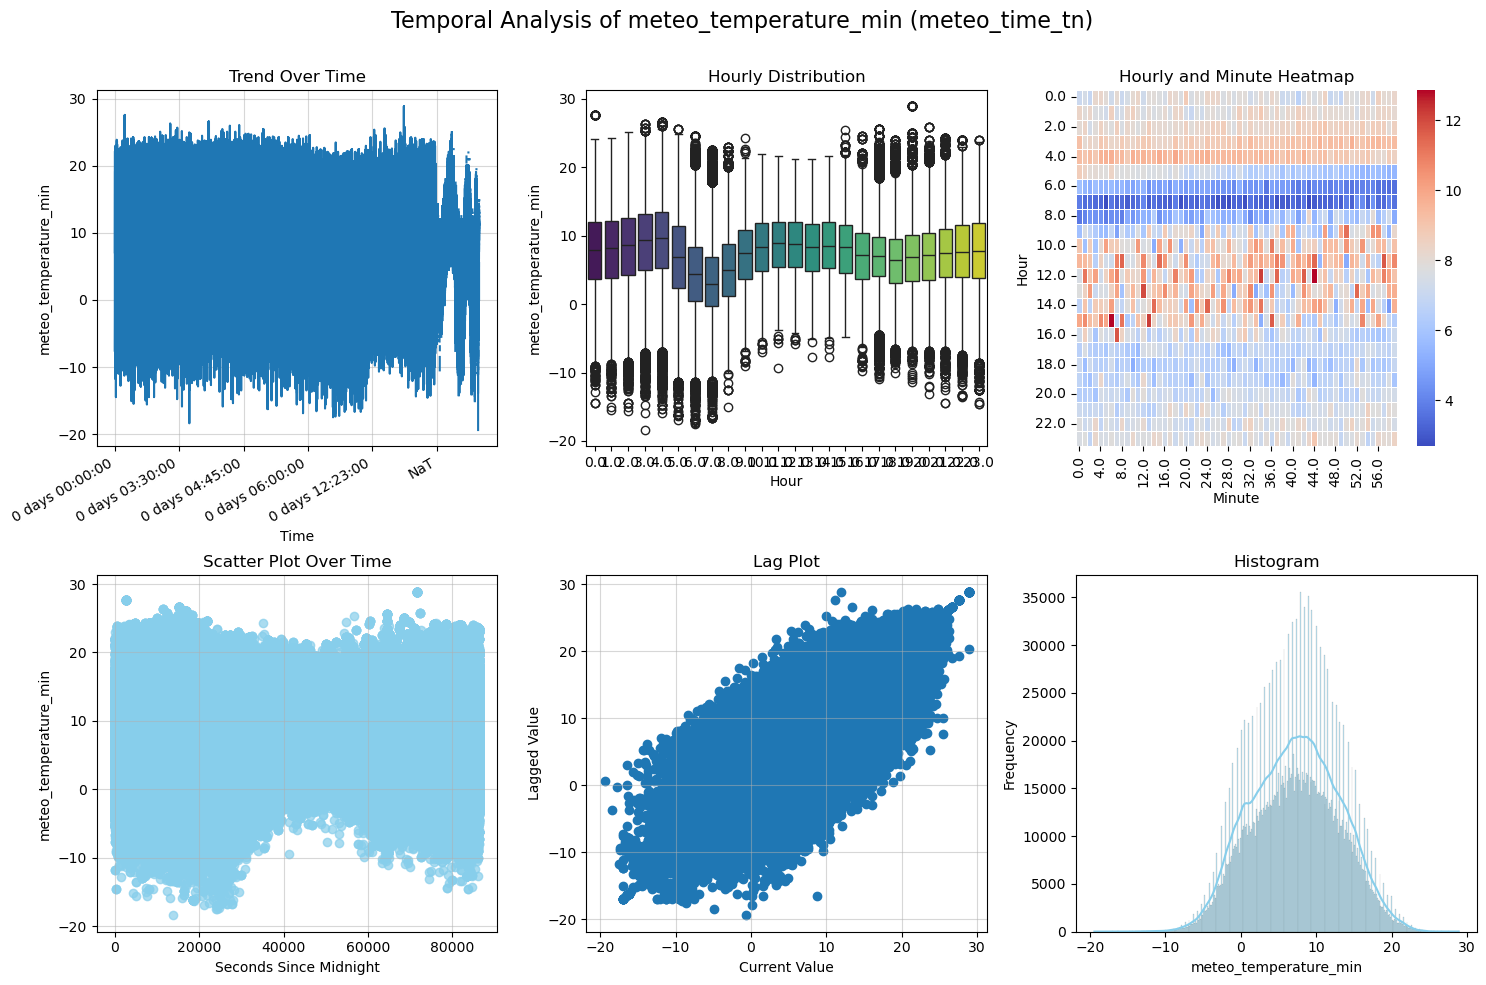

Analyzing: meteo_time_tx and meteo_temperature_max


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


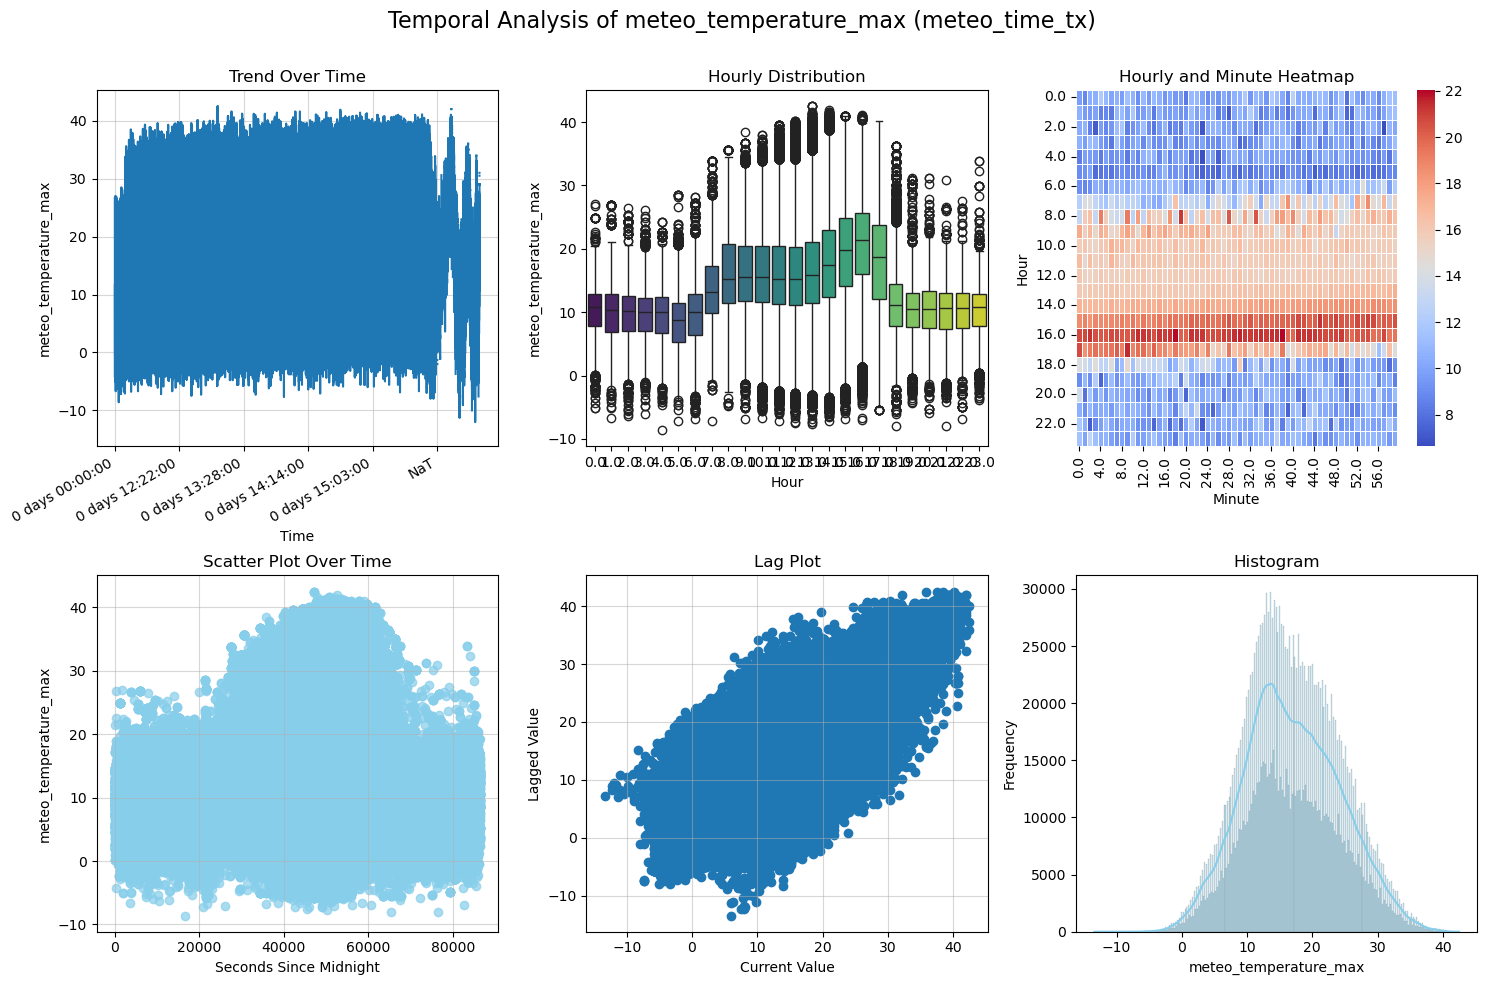

Analyzing: meteo_time_wind_max and meteo_wind_max


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


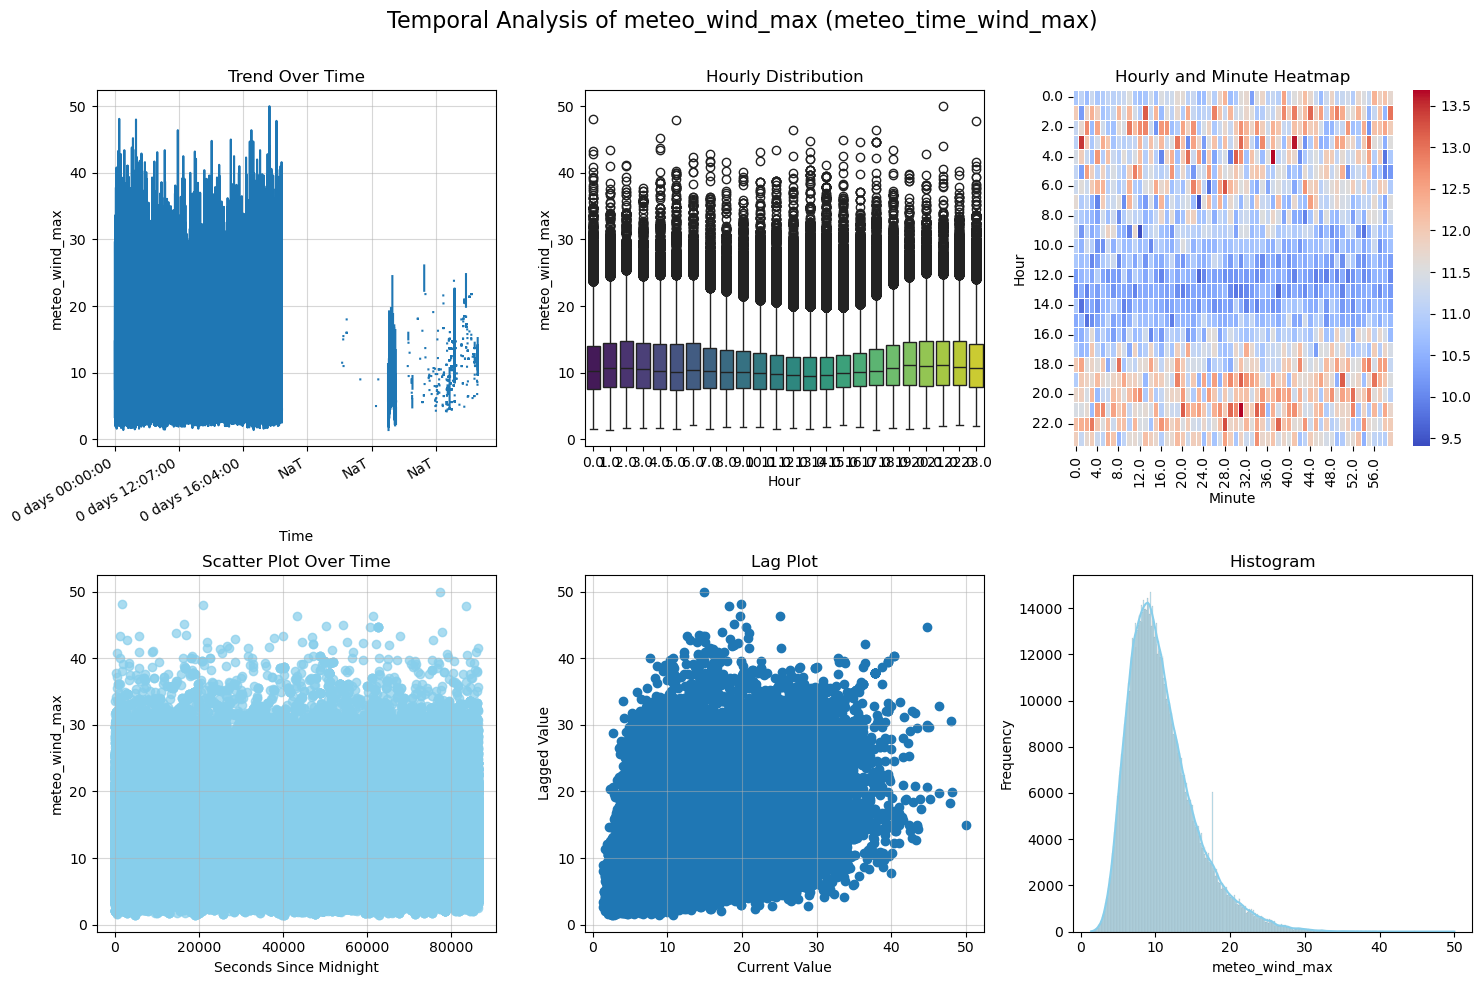

Analyzing: meteo_time_wind_avg and meteo_wind_avg


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


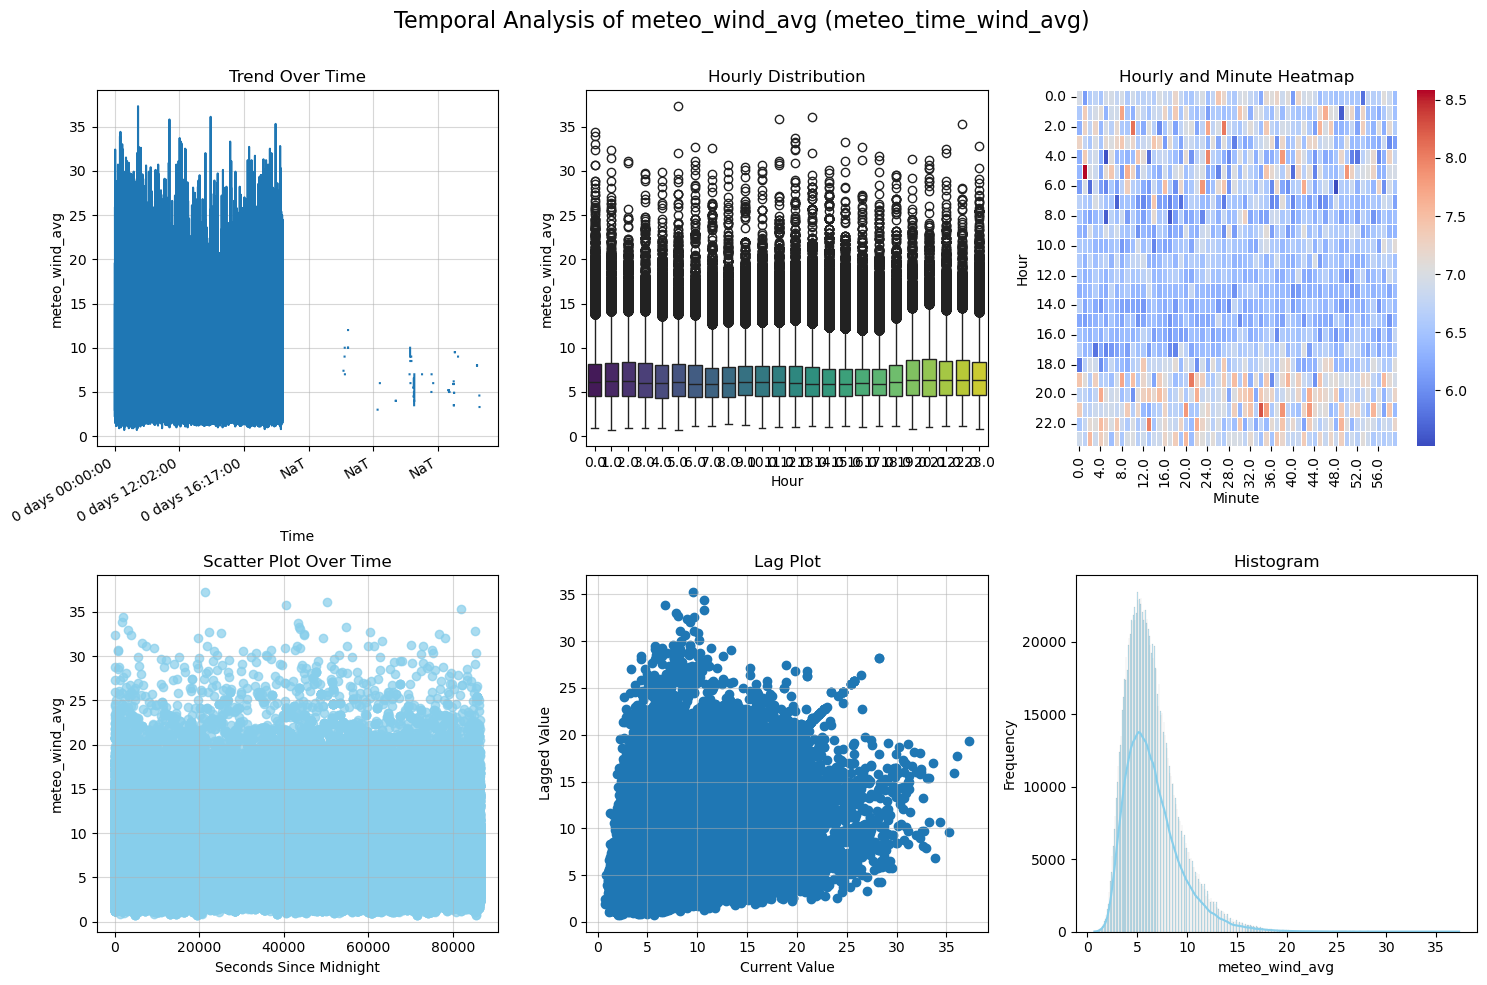

Analyzing: meteo_time_wind_max_3s and meteo_wind_max_3s


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


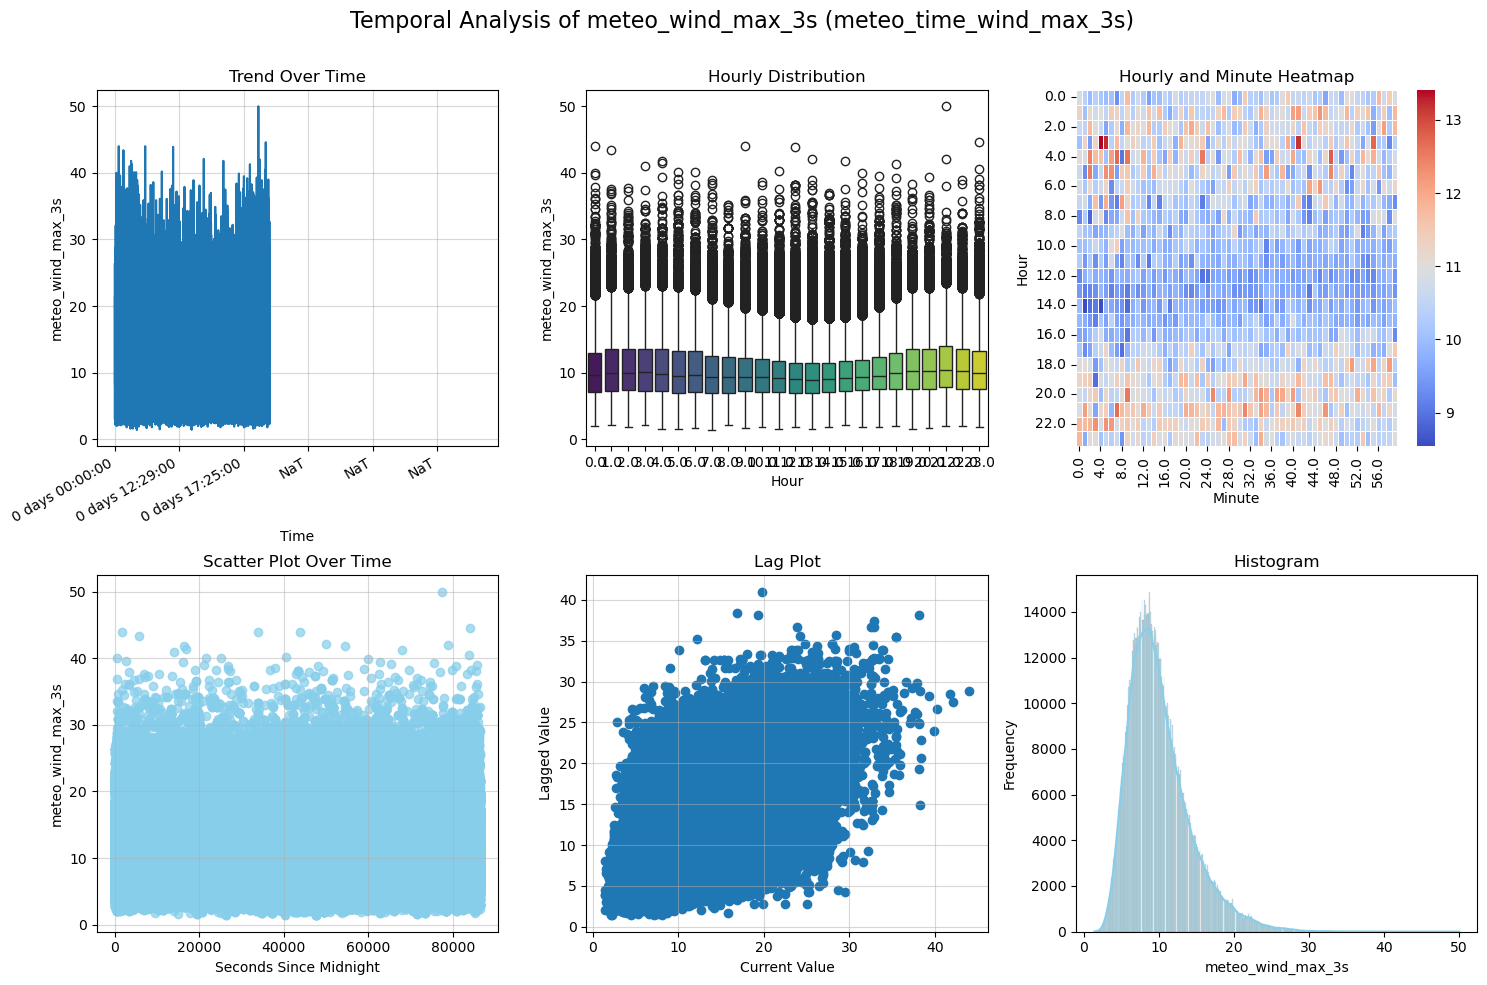

Analyzing: meteo_time_humidity_min and meteo_humidity_min


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


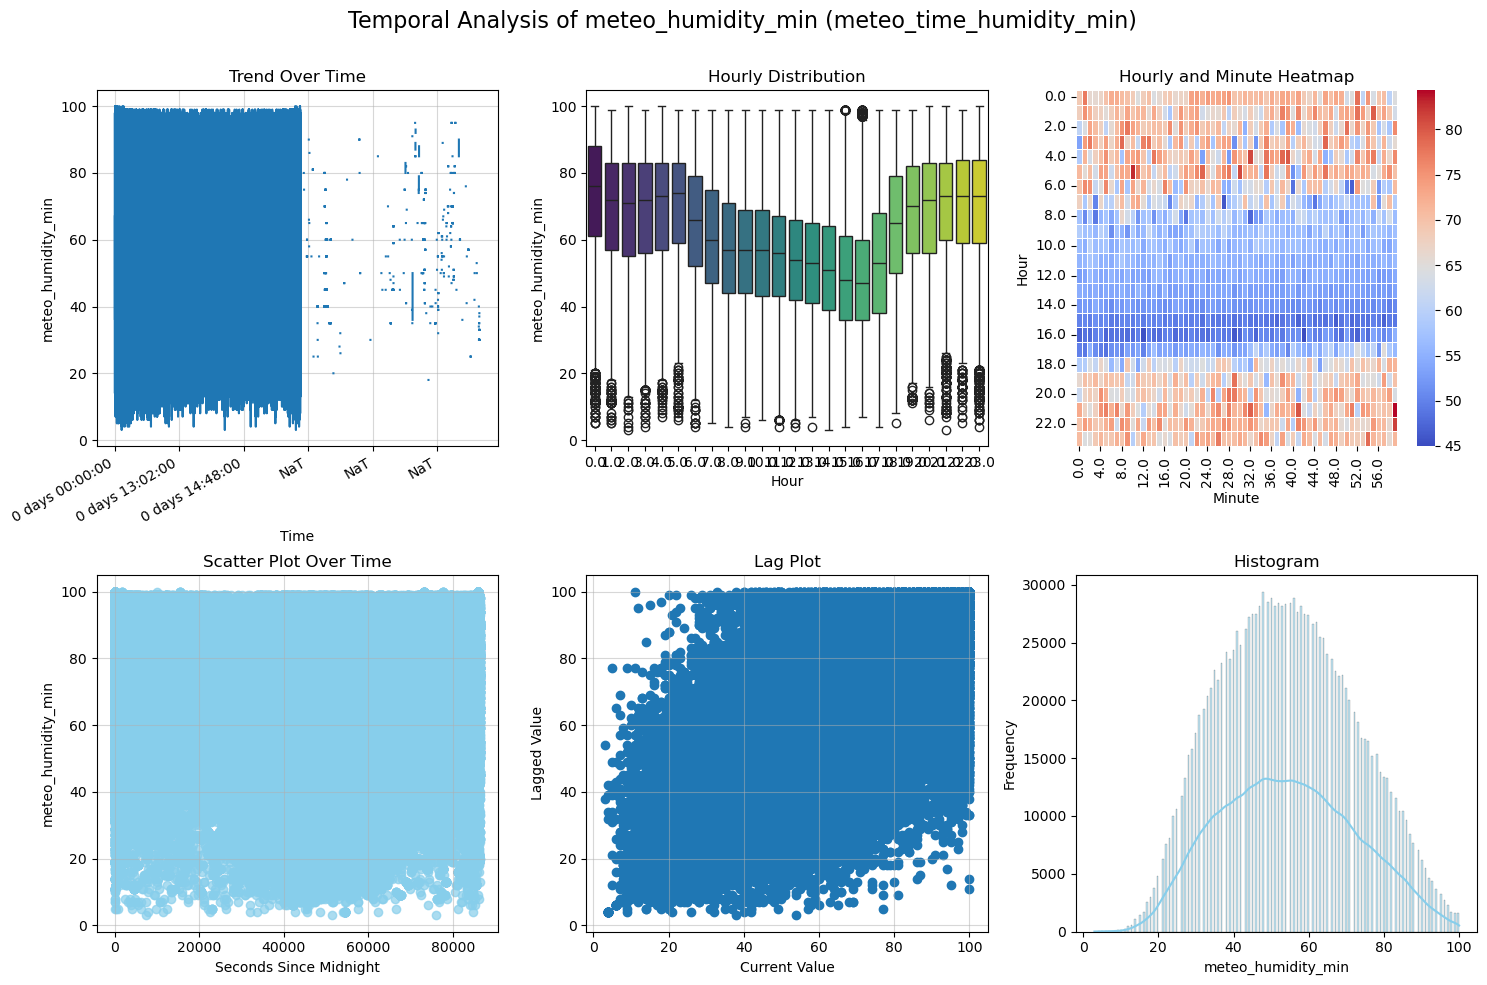

Analyzing: meteo_time_humidity_max and meteo_humidity_max


C:\Users\ayraa\AppData\Local\Temp\ipykernel_27432\3635846536.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])


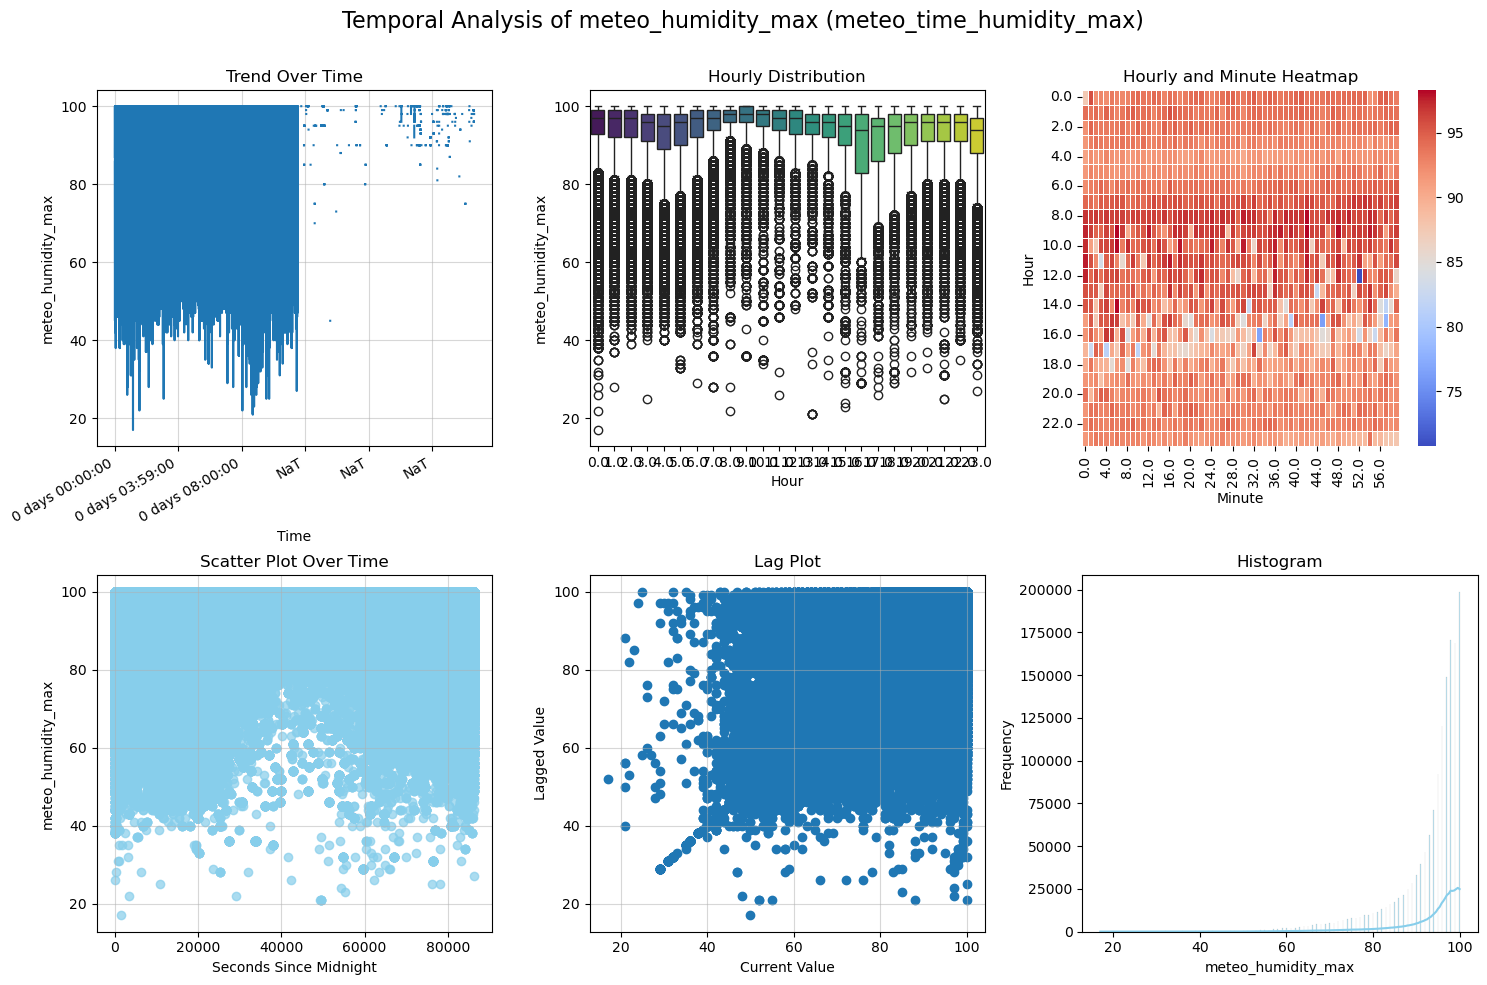

All temporal analyses completed.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from pandas.plotting import lag_plot

# Define time and value columns
time_columns = [
    'meteo_time_tn',
    'meteo_time_tx',
    'meteo_time_wind_max',
    'meteo_time_wind_avg',
    'meteo_time_wind_max_3s',
    'meteo_time_humidity_min',
    'meteo_time_humidity_max'
]

value_columns = [
    'meteo_temperature_min',
    'meteo_temperature_max',
    'meteo_wind_max',
    'meteo_wind_avg',
    'meteo_wind_max_3s',
    'meteo_humidity_min',
    'meteo_humidity_max'
]

# Function to convert HHMM float to timedelta
def hhmm_to_timedelta(hhmm):
    """Convert HHMM float to timedelta."""
    if isinstance(hhmm, pd.Timedelta) or pd.isna(hhmm):
        return hhmm
    try:
        hhmm = int(hhmm)
        hours = hhmm // 100
        minutes = hhmm % 100
        return timedelta(hours=hours, minutes=minutes)
    except ValueError:
        return pd.NaT

# Apply conversion to the time columns
for col in time_columns:
    data_copy[col] = data_copy[col].apply(hhmm_to_timedelta)

# Function to create a grid of plots for each feature
def plot_temporal_analysis_grid(time_col, value_col, data):
    print(f"Analyzing: {time_col} and {value_col}")
    
    # Prepare data for plots
    data['hour'] = data[time_col].dt.seconds // 3600
    data['minute'] = (data[time_col].dt.seconds // 60) % 60

    # Create subplots in a 2x3 grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Temporal Analysis of {value_col} ({time_col})', fontsize=16)

    # Line Plot
    data.set_index(time_col)[value_col].sort_index().plot(ax=axes[0, 0])
    axes[0, 0].set_title('Trend Over Time')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel(value_col)
    axes[0, 0].grid(alpha=0.5)

    # Box Plot by Hour
    sns.boxplot(x='hour', y=value_col, data=data, palette='viridis', ax=axes[0, 1])
    axes[0, 1].set_title('Hourly Distribution')
    axes[0, 1].set_xlabel('Hour')
    axes[0, 1].set_ylabel(value_col)

    # Heatmap for Hourly Patterns
    pivot = data.pivot_table(index='hour', columns='minute', values=value_col, aggfunc='mean')
    sns.heatmap(pivot, cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5, ax=axes[0, 2])
    axes[0, 2].set_title('Hourly and Minute Heatmap')
    axes[0, 2].set_xlabel('Minute')
    axes[0, 2].set_ylabel('Hour')

    # Scatter Plot
    axes[1, 0].scatter(data[time_col].dt.seconds, data[value_col], alpha=0.7, c='skyblue')
    axes[1, 0].set_title('Scatter Plot Over Time')
    axes[1, 0].set_xlabel('Seconds Since Midnight')
    axes[1, 0].set_ylabel(value_col)
    axes[1, 0].grid(alpha=0.5)

    # Lag Plot
    lag_plot(data[value_col], ax=axes[1, 1])
    axes[1, 1].set_title('Lag Plot')
    axes[1, 1].set_xlabel('Current Value')
    axes[1, 1].set_ylabel('Lagged Value')
    axes[1, 1].grid(alpha=0.5)

    # Histogram
    sns.histplot(data[value_col], kde=True, ax=axes[1, 2], color='skyblue')
    axes[1, 2].set_title('Histogram')
    axes[1, 2].set_xlabel(value_col)
    axes[1, 2].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Generate grid plots for each time and value column pair
for time_col, value_col in zip(time_columns, value_columns):
    plot_temporal_analysis_grid(time_col, value_col, data_copy)

print("All temporal analyses completed.")


`meteo_temperature_min` and `meteo_humidity_min`

The graph analysis of the meteorological variables **minimum temperature** (`meteo_temperature_min`) and **minimum humidity** (`meteo_humidity_min`) reveals key temporal patterns that are critical for predicting the **groundwater level category** during the summer months. The trends over time for both variables exhibit significant diurnal fluctuations, with temperature ranging from approximately **-20°C to +30°C** and humidity between **20% and 100%**. Notably, temperature displays frequent high-frequency variations, with sharp decreases during certain intervals, potentially corresponding to nighttime or extreme weather conditions. In contrast, humidity shows a relatively stable pattern with visible gaps in the dataset, indicating potential data quality issues or missing values.

The hourly distribution of temperature and humidity highlights their inverse relationship. Temperature variability peaks between **10:00 AM and 5:00 PM**, while it stabilizes during early morning and nighttime hours. Conversely, humidity is higher during the early morning (0:00 to 6:00 AM) and decreases significantly during midday and early afternoon. This pattern underscores the importance of considering the time of day when analyzing groundwater levels, as higher temperatures and lower humidity during the afternoon can lead to increased evaporation and reduced groundwater recharge, whereas early morning hours may offer more favorable conditions for water retention.

The heatmaps further emphasize these diurnal cycles. For temperature, consistent high values during the afternoon and evening contrast with cooling trends in the early morning. The humidity heatmap, however, shows high concentrations during the early morning hours, with a sharp decline around noon. These observations reinforce the need for time-dependent features in your predictive model, as the interaction between temperature and humidity throughout the day directly influences groundwater levels. Additionally, irregularities and gaps in the heatmap data indicate potential missing or erroneous values that may need to be addressed through data cleaning or imputation techniques.

The scatter plots of both temperature and humidity over time reveal strong cyclic patterns corresponding to the time of day. Temperature displays a clear **bimodal behavior**, with distinct clusters representing daytime highs and nighttime lows. In contrast, humidity shows a more consistent but gradually tapering pattern, with the lowest values observed during midday. These cyclic behaviors suggest that incorporating **hour-of-day** and **lagged variables** into your model could significantly improve its accuracy by capturing these recurring patterns.

Lag plots indicate a high degree of autocorrelation for both variables, especially for temperature, where current values are strongly related to their previous states. This suggests that historical temperature data can be used effectively to predict future values, making it a strong candidate for time-series models such as **ARIMA**, **LSTM**, or other autoregressive techniques. Although humidity also exhibits autocorrelation, it appears more scattered, indicating slightly less predictability than temperature but still valuable as a feature.

Finally, the histograms reveal distinct distributions for the two variables. Temperature follows a roughly normal distribution with a slight positive skew, indicating that most summer temperatures are centered around moderate values, with more extreme high temperatures than low ones. On the other hand, humidity displays a **bimodal distribution**, reflecting two dominant states: one representing the high humidity of nighttime and another representing the lower humidity of daytime. These differences suggest that temperature and humidity behave differently and should be treated separately during feature engineering to capture their respective impacts on groundwater levels.

Thus this underscores the critical influence of temperature and humidity on groundwater levels, particularly during summer months when evaporation and water loss are at their peak. Effective water management strategies should consider the diurnal fluctuations, with irrigation and conservation efforts targeted during early morning hours when conditions are more favorable for water retention. Additionally, incorporating time-based features and addressing data quality issues will enhance the accuracy and reliability of the predictive model, ultimately supporting better resource allocation, agricultural planning, and disaster mitigation efforts related to water scarcity.

`meteo_time_wind_avg`

The analysis of meteo_wind_avg in relation to piezo_groundwater_level_category reveals potential interactions between wind patterns and groundwater dynamics. Wind speed exhibits considerable variability over time, with some extreme wind events that could influence groundwater recharge or evaporation. These patterns may play a role in localized climatic effects, impacting groundwater levels indirectly through changes in surface conditions or vegetation transpiration. The hourly distribution of wind speeds highlights periodic spikes, which may correlate with specific environmental or temporal factors that also influence groundwater recharge or depletion cycles.

The lag plot for wind speeds indicates persistence in wind behavior, suggesting that consistent wind conditions over time may have an extended impact on groundwater systems. This persistence could align with lagged groundwater responses, particularly in areas where wind affects evaporation rates or precipitation distribution. The skewed histogram of wind speed, which shows a dominance of lower speeds with occasional higher outliers, suggests that stable wind conditions likely contribute to more stable groundwater levels, while higher wind speeds could drive fluctuations through increased evaporation or soil drying.

These observations provide valuable insights for businesses and resource planners. Wind patterns could serve as indicators of groundwater recharge or evaporation rates, making them a useful tool for optimizing agricultural practices or water utility operations. Areas prone to high wind activity might need to consider the impact of wind on groundwater availability when designing infrastructure or managing water resources. Furthermore, understanding the relationship between wind and groundwater can support renewable energy projects, such as wind farms, by aligning energy production strategies with the dynamics of water resources in the region. A deeper exploration of how wind interacts with specific groundwater level categories could uncover actionable strategies for sustainable resource management.

# Cleaning the Data

In [6]:
# Identify categorical and numerical columns dynamically
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Number of Categorical Columns:", len(categorical_columns))
print("Numerical Columns:", numerical_columns)
print("Number of Numerical Columns:", len(numerical_columns))

Categorical Columns: ['piezo_station_department_code', 'piezo_station_update_date', 'piezo_station_department_name', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_station_commune_name', 'piezo_station_bss_id', 'piezo_bss_code', 'piezo_measurement_date', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_continuity_name', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab', 'hydro_status_label', 'hydro_method_label', 'hydro_qualification_label', 'hydro_hydro_quantity_elab', 'prelev_structure_code_0', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_structure_code_1', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_structure_code_2', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 

## Check Missing Values

In [7]:
# Identify missing values
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
piezo_station_investigation_depth    179062
piezo_station_pe_label               229852
piezo_station_bdlisa_codes           141346
piezo_producer_code                  145822
piezo_producer_name                  145822
                                      ...  
insee_%_agri                          26820
insee_pop_commune                     26820
insee_med_living_level                26820
insee_%_ind                           26820
insee_%_const                         26820
Length: 97, dtype: int64


In [8]:
df_train.shape

(2830316, 136)

## Dropping Redundant and Unnecessary Columns From Piezometric_data

In [9]:
# List of redundant features to remove
redundant_features = [
    'piezo_station_department_name',      # Department name
    'piezo_station_commune_name',         # Commune name (if spatial data is used)
    'piezo_station_bss_id',               # National BSS code (keep piezo_bss_code instead)
    'piezo_station_update_date',          # Update date (less relevant than measurement date)
    'piezo_producer_name',                # Producer name (metadata)
    'piezo_continuity_name',              # Redundant with continuity_code
]

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_train.shape)

# Drop the columns from the DataFrame
df_train = df_train.drop(columns=redundant_features, axis=1)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_train.shape)

Original DataFrame shape: (2830316, 136)
Cleaned DataFrame shape: (2830316, 130)


## Dropping Redundant and Unnecessary Columns From hydrometric_data

In [10]:
# List of redundant features to remove
redundant_features = [
    'hydro_status_label',        # Redundant with hydro_status_code
    'hydro_method_label',        # Redundant with hydro_method_code
    'hydro_qualification_label'  # Redundant with hydro_qualification_code
]

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_train.shape)

# Drop the columns from the DataFrame
df_train = df_train.drop(columns=redundant_features, axis=1)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_train.shape)


Original DataFrame shape: (2830316, 130)
Cleaned DataFrame shape: (2830316, 127)


## Dropping Redundant and Unnecessary Columns From water_withdrawal_data

In [11]:
# List of redundant features to remove
redundant_features = [
    'prelev_commune_code_insee_0',
    'prelev_commune_code_insee_1',
    'prelev_commune_code_insee_2',
    'prelev_structure_code_0',
    'prelev_structure_code_1',
    'prelev_structure_code_2'
]

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_train.shape)

# Drop the columns from the DataFrame
df_train = df_train.drop(columns=redundant_features, axis=1)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_train.shape)

Original DataFrame shape: (2830316, 127)
Cleaned DataFrame shape: (2830316, 121)


## Dropping Columns with more than 80% Missing Values

In [12]:
# Set a threshold for missing values (e.g., 60% missing allowed)
threshold = 0.8
missing_ratios = df_train.isnull().sum() / len(df_train)

# Drop columns exceeding the threshold
columns_to_drop = missing_ratios[missing_ratios > threshold].index

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_train.shape)

df_train = df_train.drop(columns=columns_to_drop)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_train.shape)
print(f"Dropped columns: {columns_to_drop}")


Original DataFrame shape: (2830316, 121)
Cleaned DataFrame shape: (2830316, 87)
Dropped columns: Index(['meteo_DRR', 'meteo_temperature_min_50cm', 'meteo_pressure_avg',
       'meteo_pression_maxi', 'meteo_wind_speed_avg_2m', 'meteo_wind_max_2m',
       'meteo_wind_direction_max_inst_2m', 'meteo_time_wind_max_2m',
       'meteo_wetting_duration', 'meteo_sunshine_duration', 'meteo_radiation',
       'meteo_radiation_direct', 'meteo_sunshine_%', 'meteo_radiation_IR',
       'meteo_radiation_UV_max', 'meteo_cloudiness', 'meteo_cloudiness_height',
       'meteo_if_snow', 'meteo_if_fog', 'meteo_if_thunderstorm',
       'meteo_if_sleet', 'meteo_if_hail', 'meteo_if_dew', 'meteo_if_black_ice',
       'meteo_if_snow_ground', 'meteo_if_frost', 'meteo_if_smoke',
       'meteo_if_mist', 'meteo_if_lightning',
       'meteo_evapotranspiration_Monteith', 'meteo_radiation_UV',
       'meteo_snow_height', 'meteo_snow_thickness_max',
       'meteo_snow_thickness_6h'],
      dtype='object')


## Checking Missing Values of the Remaining Columns

In [13]:
# Identify missing values
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
piezo_station_investigation_depth        179062
piezo_station_pe_label                   229852
piezo_station_bdlisa_codes               141346
piezo_producer_code                      145822
piezo_measure_nature_code                112386
piezo_measure_nature_name                112386
meteo_rain_height                         25477
meteo_temperature_min                    240589
meteo_time_tn                            340239
meteo_temperature_max                    237144
meteo_time_tx                            339662
meteo_temperature_avg                    331982
meteo_temperature_avg_threshold          240841
meteo_temperature_min_ground            2074369
meteo_frost_duration                     477120
meteo_amplitude_tn_tx                    240841
meteo_temperature_avg_tntm               240841
meteo_wind_speed_avg_10m                1525347
meteo_wind_max                          1525100
meteo_wind_direction_max_inst           1528330
meteo_tim

## Handle Datetime parsing

In [14]:
# Identify categorical and numerical columns dynamically
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Number of Categorical Columns:", len(categorical_columns))
print("Numerical Columns:", numerical_columns)
print("Number of Numerical Columns:", len(numerical_columns))

Categorical Columns: ['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_measurement_date', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category']
Number of Categorical Columns: 28
Numerical Columns: ['row_index', 'piezo_station_investigation_depth', 'piezo_station_altitude', 'piezo_station_longitude', 'piezo_station_latitude', 'piezo_continuity_code', 'piezo_producer_code', 'meteo_id', 'meteo_

In [15]:
# Identify categorical columns by name patterns
categorical_by_name = [col for col in df_train.columns if '_code' in col or 'type' in col]

# Combine with the existing logic
categorical_columns = list(set(df_train.select_dtypes(include=['object', 'category']).columns.tolist() + categorical_by_name))
numerical_columns = [col for col in df_train.select_dtypes(include=['int64', 'float64']).columns.tolist() if col not in categorical_by_name]

print("Categorical Columns:", categorical_columns)
print("Number of Categorical Columns:", len(categorical_columns))
print("Numerical Columns:", numerical_columns)
print("Number of Numerical Columns:", len(numerical_columns))


Categorical Columns: ['prelev_usage_label_1', 'meteo_date', 'prelev_usage_label_0', 'piezo_continuity_code', 'hydro_status_code', 'piezo_station_department_code', 'hydro_station_code', 'insee_%_ind', 'insee_%_const', 'insee_med_living_level', 'hydro_observation_date_elab', 'piezo_measure_nature_code', 'piezo_station_pe_label', 'piezo_bss_code', 'prelev_volume_obtention_mode_label_2', 'piezo_measurement_date', 'piezo_qualification', 'piezo_measure_nature_name', 'prelev_volume_obtention_mode_label_1', 'prelev_volume_obtention_mode_label_0', 'hydro_method_code', 'piezo_status', 'piezo_station_commune_code_insee', 'hydro_qualification_code', 'prelev_usage_label_2', 'insee_%_agri', 'piezo_obtention_mode', 'piezo_groundwater_level_category', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'hydro_hydro_quantity_elab', 'meteo_name', 'piezo_station_bss_code']
Number of Categorical Columns: 33
Numerical Columns: ['row_index', 'piezo_station_investigation_depth', 'piezo_station_altitude', 'p

In [16]:
df_train_copy = df_train.copy()

In [17]:
potential_date_cols = df_train_copy.select_dtypes(include=['object']).columns
print(f"Potential date columns: {potential_date_cols}")

Potential date columns: Index(['piezo_station_department_code', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_bss_code', 'piezo_measurement_date',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name',
       'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_hydro_quantity_elab', 'prelev_usage_label_0',
       'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2',
       'prelev_volume_obtention_mode_label_2', 'insee_%_agri',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const',
       'piezo_groundwater_level_category'],
      dtype='object')


In [18]:
import pandas as pd

# Sample DataFrame (use your own DataFrame)
# df = pd.read_csv('your_data.csv')

# Step 1: Identify columns with object data type
object_columns = df_train_copy.select_dtypes(include=['object']).columns

# Step 2: Filter columns that can be converted to datetime
date_columns = []

for col in object_columns:
    try:
        # Attempt to convert the column to datetime
        pd.to_datetime(df_train_copy[col], errors='raise')
        date_columns.append(col)
    except (ValueError, TypeError):
        # If conversion fails, it's not a date column
        pass

# Display identified date columns
print(f"Identified date columns: {date_columns}")


Identified date columns: ['piezo_measurement_date', 'meteo_date', 'hydro_observation_date_elab']


In [19]:
time_columns =  [
    'meteo_time_tn',
    'meteo_time_tx',
    'meteo_time_wind_max',
    'meteo_time_wind_avg',
    'meteo_time_wind_max_3s',
    'meteo_time_humidity_min',
    'meteo_time_humidity_max'
]

# Function to extract hours and minutes and convert to total minutes and seconds
def convert_time_columns(df, time_columns):
    for col in time_columns:
        df[col + '_hour'] = (df[col] // 100).astype(object)   # Extract the hour
        df[col + '_minute'] = (df[col] % 100).astype(object)   # Extract the minute

        # Handle invalid minutes (> 59) and hours (> 23)
        df.loc[df[col + '_minute'] >= 60, col + '_minute'] = 0
        df.loc[df[col + '_hour'] >= 24, col + '_hour'] = 0
        
    return df

# Apply the function
df_train_copy = convert_time_columns(df_train_copy, time_columns)

df_train_copy.drop(columns=time_columns, inplace=True)

# Display the processed DataFrame
df_train.head()

,row_index,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,...,prelev_volume_obtention_mode_label_2,prelev_longitude_2,prelev_latitude_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,20.00,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,5.748241,45.828148,...,Mesure indirecte,5.698947,45.725106,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,35.60,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,5.356637,46.028102,...,Mesure indirecte,5.464933,46.210734,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,35.22,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,5.220795,45.895734,...,Mesure indirecte,5.085060,45.812828,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,34.20,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,5.948977,46.201180,...,Mesure indirecte,5.802841,46.366049,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,37.30,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,5.313353,46.136402,...,Mesure indirecte,5.377265,46.080989,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low


## Final Categorical Columns

In [20]:
# Convert identified date columns to datetime format
for col in date_columns:
    df_train_copy[col] = pd.to_datetime(df_train_copy[col], errors='coerce')
    # Extract date features if needed
    df_train_copy[f'{col}_year'] = df_train_copy[col].dt.year.astype('object')
    df_train_copy[f'{col}_month'] = df_train_copy[col].dt.month.astype('object')
    df_train_copy[f'{col}_day'] = df_train_copy[col].dt.day.astype('object')

# Drop original datetime columns if only extracted features are needed
df_train_copy.drop(columns=date_columns, inplace=True)

# Identify all categorical columns (including datetime components)
categorical_columns = df_train_copy.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", categorical_columns)
print("Number of Categorical Columns:", len(categorical_columns))


Categorical Columns: Index(['piezo_station_department_code', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode',
       'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code',
       'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code',
       'hydro_hydro_quantity_elab', 'prelev_usage_label_0',
       'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2',
       'prelev_volume_obtention_mode_label_2', 'insee_%_agri',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const',
       'piezo_groundwater_level_category', 'meteo_time_tn_hour',
       'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute',
       'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute',
       'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute',
       'meteo_ti

## Final Numerical Columns

In [21]:
# Drop unnecessary Columns
variables_to_drop = [
    'row_index'
]

df_train_copy.drop(columns=variables_to_drop, inplace=True)

numerical_columns = df_train_copy.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:", numerical_columns)
print("Number of Numerical Columns:", len(numerical_columns))

print("Categorical Columns:", categorical_columns)
print("Number of Categorical Columns:", len(categorical_columns))

Numerical Columns: Index(['piezo_station_investigation_depth', 'piezo_station_altitude',
       'piezo_station_longitude', 'piezo_station_latitude',
       'piezo_continuity_code', 'piezo_producer_code', 'meteo_id',
       'meteo_latitude', 'meteo_longitude', 'meteo_altitude',
       'meteo_rain_height', 'meteo_temperature_min', 'meteo_temperature_max',
       'meteo_temperature_avg', 'meteo_temperature_avg_threshold',
       'meteo_temperature_min_ground', 'meteo_frost_duration',
       'meteo_amplitude_tn_tx', 'meteo_temperature_avg_tntm',
       'meteo_wind_speed_avg_10m', 'meteo_wind_max',
       'meteo_wind_direction_max_inst', 'meteo_wind_avg',
       'meteo_wind_direction_max_avg', 'meteo_wind_max_3s',
       'meteo_humidity_min', 'meteo_humidity_max',
       'meteo_humidity_duration_below_40%',
       'meteo_humidity_duration_above_80%', 'meteo__pressure_saturation_avg',
       'meteo_humidity_avg', 'meteo_evapotranspiration_grid',
       'distance_piezo_meteo', 'hydro_observat

In [22]:
print("Numerical Columns:", numerical_columns)
print("Number of Numerical Columns:", len(numerical_columns))

print("Categorical Columns:", categorical_columns)
print("Number of Categorical Columns:", len(categorical_columns))

Numerical Columns: Index(['piezo_station_investigation_depth', 'piezo_station_altitude',
       'piezo_station_longitude', 'piezo_station_latitude',
       'piezo_continuity_code', 'piezo_producer_code', 'meteo_id',
       'meteo_latitude', 'meteo_longitude', 'meteo_altitude',
       'meteo_rain_height', 'meteo_temperature_min', 'meteo_temperature_max',
       'meteo_temperature_avg', 'meteo_temperature_avg_threshold',
       'meteo_temperature_min_ground', 'meteo_frost_duration',
       'meteo_amplitude_tn_tx', 'meteo_temperature_avg_tntm',
       'meteo_wind_speed_avg_10m', 'meteo_wind_max',
       'meteo_wind_direction_max_inst', 'meteo_wind_avg',
       'meteo_wind_direction_max_avg', 'meteo_wind_max_3s',
       'meteo_humidity_min', 'meteo_humidity_max',
       'meteo_humidity_duration_below_40%',
       'meteo_humidity_duration_above_80%', 'meteo__pressure_saturation_avg',
       'meteo_humidity_avg', 'meteo_evapotranspiration_grid',
       'distance_piezo_meteo', 'hydro_observat

## Encode Categorical Columns

In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_train_copy[col] = le.fit_transform(df_train_copy[col].astype(str))
    label_encoders[col] = le

## Handling Missing Values in Numerical and Categorical Columns

In [24]:
# Identify missing values
missing_values = df_train_copy.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
piezo_station_investigation_depth     179062
piezo_producer_code                   145822
meteo_rain_height                      25477
meteo_temperature_min                 240589
meteo_temperature_max                 237144
meteo_temperature_avg                 331982
meteo_temperature_avg_threshold       240841
meteo_temperature_min_ground         2074369
meteo_frost_duration                  477120
meteo_amplitude_tn_tx                 240841
meteo_temperature_avg_tntm            240841
meteo_wind_speed_avg_10m             1525347
meteo_wind_max                       1525100
meteo_wind_direction_max_inst        1528330
meteo_wind_avg                       1529648
meteo_wind_direction_max_avg         1530776
meteo_wind_max_3s                    1629831
meteo_humidity_min                   1387130
meteo_humidity_max                   1387245
meteo_humidity_duration_below_40%    1398442
meteo_humidity_duration_above_80%    1399892
meteo__pressure_saturati

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
import pandas as pd222

def impute_missing_values(df, numerical_columns, categorical_columns, n_neighbors=5):
    """
    Impute missing values in numerical and categorical columns using IterativeImputer and KNNImputer respectively.

    Parameters:
        df (pd.DataFrame): Input DataFrame with missing values.
        numerical_columns (list): List of numerical column names.
        categorical_columns (list): List of label-encoded categorical column names.
        n_neighbors (int): Number of neighbors to use for KNNImputer (default=5).

    Returns:
        pd.DataFrame: DataFrame with imputed values.
    """
    df_copy = df.copy()
    df_copy.drop(columns = ['piezo_groundwater_level_category'], inplace = True)
    # Ensure numerical_columns and categorical_columns are lists
    numerical_columns = list(numerical_columns)
    categorical_columns = list(categorical_columns)
    categorical_columns.remove('piezo_groundwater_level_category')
    # Impute numerical columns using IterativeImputer
    if numerical_columns:
        iterative_imputer = IterativeImputer(random_state=42)
        df_copy[numerical_columns] = iterative_imputer.fit_transform(df_copy[numerical_columns])
    
    # Impute categorical columns using KNNImputer
    if categorical_columns:
        knn_imputer = KNNImputer(n_neighbors=n_neighbors)
        df_copy[categorical_columns] = knn_imputer.fit_transform(df_copy[categorical_columns])
        
        # Round and convert back to integers (as they are label-encoded)
        df_copy[categorical_columns] = df_copy[categorical_columns].round().astype(int)
    
    return df_copy, knn_imputer, iterative_imputer

categorical_columns_copy = categorical_columns.copy()
imputed_df,knn_imputer, iterative_imputer = impute_missing_values(df_train_copy, numerical_columns, categorical_columns_copy)

imputed_df['piezo_groundwater_level_category'] = df_train_copy['piezo_groundwater_level_category']
missing_values = imputed_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


c:\Users\ayraa\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Missing values in each column:
Series([], dtype: int64)


In [26]:
df_train_copy = imputed_df.copy()

In [27]:
columns_for_test = ['piezo_station_department_code', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode',
       'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code',
       'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code',
       'hydro_hydro_quantity_elab', 'prelev_usage_label_0',
       'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2',
       'prelev_volume_obtention_mode_label_2', 'insee_%_agri',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'meteo_time_tn_hour',
       'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute',
       'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute',
       'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute',
       'meteo_time_wind_max_3s_hour', 'meteo_time_wind_max_3s_minute',
       'meteo_time_humidity_min_hour', 'meteo_time_humidity_min_minute',
       'meteo_time_humidity_max_hour', 'meteo_time_humidity_max_minute',
       'piezo_measurement_date_year', 'piezo_measurement_date_month',
       'piezo_measurement_date_day', 'meteo_date_year', 'meteo_date_month',
       'meteo_date_day', 'hydro_observation_date_elab_year',
       'hydro_observation_date_elab_month', 'hydro_observation_date_elab_day']
columns_for_test

['piezo_station_department_code',
 'piezo_station_commune_code_insee',
 'piezo_station_pe_label',
 'piezo_station_bdlisa_codes',
 'piezo_station_bss_code',
 'piezo_bss_code',
 'piezo_obtention_mode',
 'piezo_status',
 'piezo_qualification',
 'piezo_measure_nature_code',
 'piezo_measure_nature_name',
 'meteo_name',
 'hydro_station_code',
 'hydro_hydro_quantity_elab',
 'prelev_usage_label_0',
 'prelev_volume_obtention_mode_label_0',
 'prelev_usage_label_1',
 'prelev_volume_obtention_mode_label_1',
 'prelev_usage_label_2',
 'prelev_volume_obtention_mode_label_2',
 'insee_%_agri',
 'insee_med_living_level',
 'insee_%_ind',
 'insee_%_const',
 'meteo_time_tn_hour',
 'meteo_time_tn_minute',
 'meteo_time_tx_hour',
 'meteo_time_tx_minute',
 'meteo_time_wind_max_hour',
 'meteo_time_wind_max_minute',
 'meteo_time_wind_avg_hour',
 'meteo_time_wind_avg_minute',
 'meteo_time_wind_max_3s_hour',
 'meteo_time_wind_max_3s_minute',
 'meteo_time_humidity_min_hour',
 'meteo_time_humidity_min_minute',
 'met

In [28]:
df_train_copy.head()

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day,meteo_date_year,meteo_date_month,meteo_date_day,hydro_observation_date_elab_year,hydro_observation_date_elab_month,hydro_observation_date_elab_day,piezo_groundwater_level_category
0,0,20.00,3,1550,741,232.00,1562,5.748241,45.828148,1562,...,0,0,0,0,0,0,0,0,0,1
1,0,35.60,8,1542,756,247.25,1467,5.356637,46.028102,1467,...,0,0,0,0,0,0,0,0,0,3
2,0,35.22,5,1530,15,218.77,1558,5.220795,45.895734,1558,...,0,0,0,0,0,0,0,0,0,1
3,0,34.20,6,1543,581,499.85,1418,5.948977,46.201180,1418,...,0,0,0,0,0,0,0,0,0,3
4,0,37.30,15,613,565,260.00,1417,5.313353,46.136402,1417,...,0,0,0,0,0,0,0,0,0,4


### Drop the Date type redundant Categorical Columns

In [29]:
columns_to_drop = ['meteo_date_day', 'meteo_date_month', 'meteo_date_year', 'hydro_observation_date_elab_year',
       'hydro_observation_date_elab_month', 'hydro_observation_date_elab_day']
df_train_copy.drop(columns = columns_to_drop, axis=1, inplace = True)
categorical_columns = [col for col in categorical_columns if col not in columns_to_drop]

print("Updated Categorical Columns:", categorical_columns)

Updated Categorical Columns: ['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category', 'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute', 'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour', 'meteo_time_wind_max_3s_minute', 'meteo_time_humidity_min_hour', 'meteo_ti

## Class Imbalance in the Target Variable

In [30]:
df_train = df_train_copy.copy()

Class distribution in the target variable:
0    649464
2    629911
1    582020
4    537077
3    431844
Name: piezo_groundwater_level_category, dtype: int64


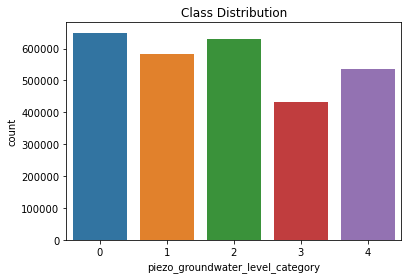

In [31]:
# Check for class imbalance in the target variable
class_counts = df_train['piezo_groundwater_level_category'].value_counts()
print("Class distribution in the target variable:")
print(class_counts)

# Visualize class imbalance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.countplot(data=df_train, x='piezo_groundwater_level_category')
plt.title("Class Distribution")
plt.show()


As can be seen from the above bar plot, there seems to be minimal class imbalance in the training dataset. This needs no further handling. If some individuals have some other opinions on the class distribution, then techniques like resampling (oversampling the minority classes, undersampling the majority classes) or stratified K-fold Cross Validation could be implemented. Moreover, we have in one of the models used later, implemented handling of class imbalance specifically by using the class_weights parameter in RandomForestClassifier which gives a stronger penalty for incorrectly classifying the minority class.

## Scale Numerical Variables

In [32]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [33]:
df_train.head()

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,meteo_time_wind_max_3s_hour,meteo_time_wind_max_3s_minute,meteo_time_humidity_min_hour,meteo_time_humidity_min_minute,meteo_time_humidity_max_hour,meteo_time_humidity_max_minute,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day,piezo_groundwater_level_category
0,0,-0.280472,3,1550,741,0.441917,1562,1.297251,-0.268211,1562,...,2,28,7,4,19,13,0,0,0,1
1,0,-0.214645,8,1542,756,0.521145,1467,1.153403,-0.176276,1467,...,3,24,0,1,3,22,0,0,0,3
2,0,-0.216249,5,1530,15,0.373184,1558,1.103505,-0.237136,1558,...,24,60,0,1,0,1,0,0,0,1
3,0,-0.220553,6,1543,581,1.833462,1418,1.370987,-0.096699,1418,...,24,60,24,60,24,60,0,0,0,3
4,0,-0.207472,15,613,565,0.587384,1417,1.137504,-0.126482,1417,...,24,60,24,60,24,60,0,0,0,4


In [34]:
df_train.shape

(2830316, 93)

## Final Dataset Summary

In [35]:
# Display the cleaned and balanced dataset information
print("Final Dataset Shape:", df_train.shape)
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Final Dataset Shape: (2830316, 93)
Categorical Columns: ['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category', 'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute', 'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour', 'meteo_time_wind_max_3s_minute', 'meteo_time_hu

# Defining X_train, y_train, X_test and y_test

In [36]:
df_train_n = df_train.copy()

In [37]:
y = df_train_n['piezo_groundwater_level_category']
X = df_train_n.drop(columns ='piezo_groundwater_level_category', inplace = False)
#Split the Data into X_train, X_test, y_train, y_test to set it up for ML Algorithms
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check shape of X_train, X_test, and y_train
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2264252, 92)
Shape of y_train:  (2264252,)
Shape of X_test:  (566064, 92)
Shape of y_test:  (566064,)


## Correlation Matrix and Heatmap

In [38]:
# Create a correlation matrix of train_features
correlation_matrix_features = X_train.corr()
correlation_matrix_features

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,meteo_time_wind_avg_minute,meteo_time_wind_max_3s_hour,meteo_time_wind_max_3s_minute,meteo_time_humidity_min_hour,meteo_time_humidity_min_minute,meteo_time_humidity_max_hour,meteo_time_humidity_max_minute,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day
piezo_station_department_code,1.000000,-0.022933,0.995574,1.320463e-02,-0.195720,0.024115,-0.256981,0.064584,0.302541,-0.256981,...,0.034485,0.027412,0.029557,0.066443,0.059981,0.050681,0.055700,-0.000844,0.000843,-1.104202e-04
piezo_station_investigation_depth,-0.022933,1.000000,-0.023770,-2.448010e-02,-0.001158,-0.001018,0.117280,-0.097334,-0.128796,0.117280,...,0.007430,0.002303,0.003978,0.006446,0.005571,0.010194,0.005908,0.000296,-0.000391,1.810467e-05
piezo_station_commune_code_insee,0.995574,-0.023770,1.000000,4.504510e-03,-0.201991,0.021764,-0.255993,0.057485,0.302273,-0.255993,...,0.035150,0.026642,0.028804,0.066734,0.060279,0.051685,0.055940,-0.000673,0.000864,-1.037718e-04
piezo_station_pe_label,0.013205,-0.024480,0.004505,1.000000e+00,0.038574,0.089181,0.005333,0.008961,0.015153,0.005333,...,0.006030,0.004247,0.003497,0.016933,0.014751,0.007916,0.013738,-0.003741,0.000353,-9.145052e-07
piezo_station_bdlisa_codes,-0.195720,-0.001158,-0.201991,3.857430e-02,1.000000,0.017581,0.673539,0.141919,-0.684449,0.673539,...,-0.062201,-0.013499,-0.020142,-0.074736,-0.068879,-0.066949,-0.063609,0.002577,0.000302,-1.591138e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
meteo_time_humidity_max_hour,0.050681,0.010194,0.051685,7.916110e-03,-0.066949,0.049258,-0.092631,-0.073663,0.098950,-0.092631,...,0.508754,0.504020,0.483318,0.656883,0.550379,1.000000,0.632476,0.005587,0.044425,1.031399e-02
meteo_time_humidity_max_minute,0.055700,0.005908,0.055940,1.373798e-02,-0.063609,0.065450,-0.093831,-0.042318,0.102418,-0.093831,...,0.537474,0.557005,0.519076,0.728594,0.598418,0.632476,1.000000,0.011832,0.012864,3.638396e-03
piezo_measurement_date_year,-0.000844,0.000296,-0.000673,-3.741121e-03,0.002577,0.000042,0.002991,-0.000827,-0.004433,0.002991,...,0.009516,0.006545,0.014721,0.012629,0.011659,0.005587,0.011832,1.000000,-0.192448,-2.270593e-03
piezo_measurement_date_month,0.000843,-0.000391,0.000864,3.526879e-04,0.000302,-0.000121,-0.000293,0.000718,0.000440,-0.000293,...,-0.001320,-0.023865,-0.004390,0.000139,0.002133,0.044425,0.012864,-0.192448,1.000000,-1.632010e-03


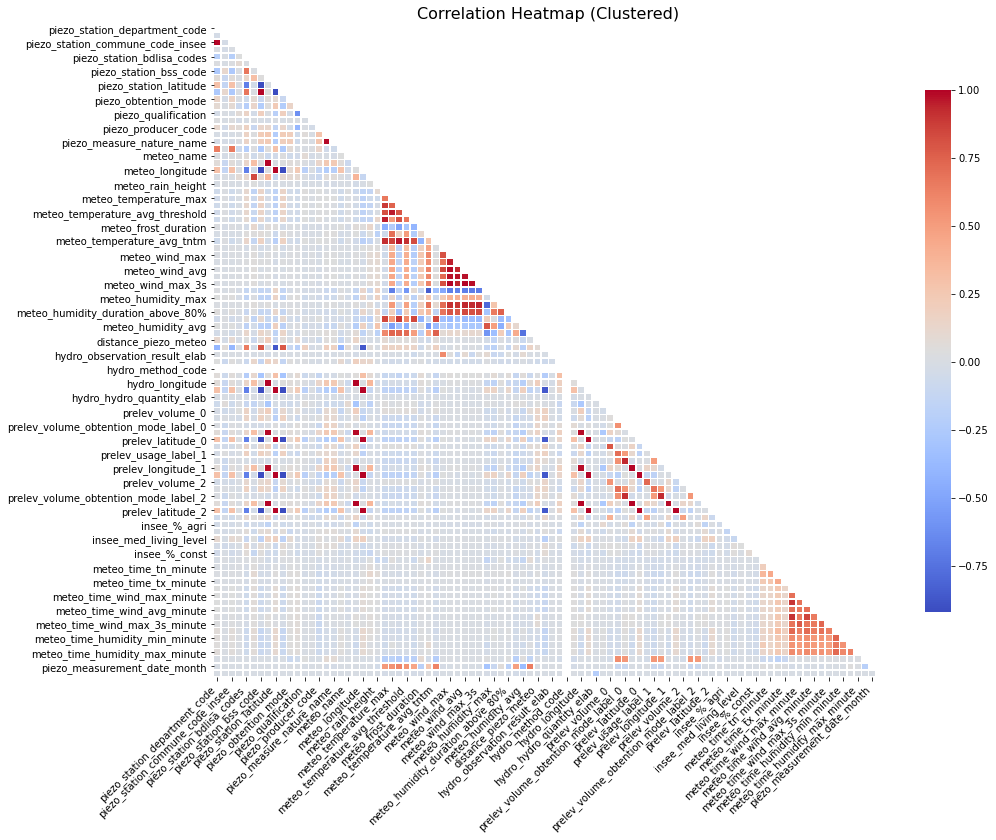

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_features, dtype=bool))

# Set up the figure size
plt.figure(figsize=(15, 12))

# Create a clustered heatmap
sns.heatmap(
    correlation_matrix_features,
    mask=mask,
    annot=False,  # Turn off annotations for better readability
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},  # Shrink colorbar for better fit
)

# Improve tick readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a title for context
plt.title('Correlation Heatmap (Clustered)', fontsize=16)

plt.show()


In [40]:
# Set correlation thresholds
highly_correlated_threshold = 0.7
moderately_correlated_threshold = 0.5

# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs = []

# Define function to determine correlation level
def get_correlation_level(correlation_value):
    if abs(correlation_value) >= highly_correlated_threshold:
        return 'Highly correlated'
    elif abs(correlation_value) >= moderately_correlated_threshold:
        return 'Moderately correlated'
    else:
        return None

# Iterate through pairs of features and accumulate moderately and highly correlated pairs
for i in range(len(correlation_matrix_features.columns)):
    for j in range(i + 1, len(correlation_matrix_features.columns)):
        feature1, feature2 = correlation_matrix_features.columns[i], correlation_matrix_features.columns[j]
        correlation_value = correlation_matrix_features.loc[feature1, feature2]
        correlation_level = get_correlation_level(correlation_value)

        if correlation_level is not None:
            correlated_pairs.append({'Feature 1': feature1,
                                     'Feature 2': feature2,
                                     'Correlation Value': correlation_value,
                                     'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_df = pd.DataFrame(correlated_pairs)

print(correlated_pairs_df)

                            Feature 1                         Feature 2  \
0       piezo_station_department_code  piezo_station_commune_code_insee   
1       piezo_station_department_code                          meteo_id   
2    piezo_station_commune_code_insee                          meteo_id   
3          piezo_station_bdlisa_codes            piezo_station_bss_code   
4          piezo_station_bdlisa_codes            piezo_station_latitude   
..                                ...                               ...   
214      meteo_time_humidity_min_hour      meteo_time_humidity_max_hour   
215      meteo_time_humidity_min_hour    meteo_time_humidity_max_minute   
216    meteo_time_humidity_min_minute      meteo_time_humidity_max_hour   
217    meteo_time_humidity_min_minute    meteo_time_humidity_max_minute   
218      meteo_time_humidity_max_hour    meteo_time_humidity_max_minute   

     Correlation Value      Correlation Level  
0             0.995574      Highly correlated  
1  

In [41]:
# Create a matrix of correlation between target variable and each feature
# Concatenate X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
target_variable = 'piezo_groundwater_level_category'

# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Extract the correlation of the target variable with other features
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Display the correlation matrix
print("Correlation of the target variable with each feature:")
print(correlation_with_target)

Correlation of the target variable with each feature:
piezo_station_department_code        0.000617
piezo_station_investigation_depth   -0.008064
piezo_station_commune_code_insee    -0.001231
piezo_station_pe_label               0.003748
piezo_station_bdlisa_codes           0.035315
                                       ...   
meteo_time_humidity_max_hour         0.001868
meteo_time_humidity_max_minute       0.007132
piezo_measurement_date_year         -0.006884
piezo_measurement_date_month         0.002156
piezo_measurement_date_day          -0.000102
Name: piezo_groundwater_level_category, Length: 92, dtype: float64


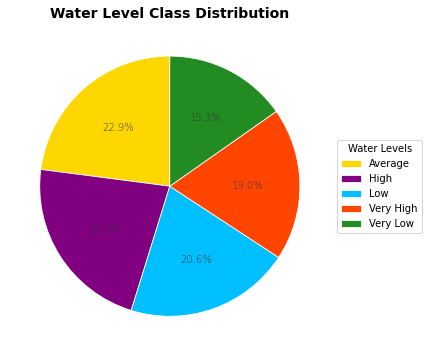

In [42]:
import matplotlib.pyplot as plt

# Data
labels = ['Average', 'High', 'Low', 'Very High', 'Very Low']
sizes = y_train.value_counts()
colors = ['#FFD700',  # Gold
          '#800080',  # Purple
          '#00BFFF',  # Deep Sky Blue
          '#FF4500',  # Orange Red
          '#228B22']  # Forest Green

# Plot
fig, ax = plt.subplots(figsize=(6, 6))  # Compact size
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Remove labels from the pie itself
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.8}  # Thin white borders for a clean look
)

# Modern legend
ax.legend(
    wedges, labels,
    title="Water Levels",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Title
plt.title('Water Level Class Distribution', fontsize=14, fontweight='bold', family='sans-serif')

# Adjust text inside the pie
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('light')
    autotext.set_color('#333333')  # Dark gray for a modern look

# Tight layout for a clean appearance
plt.tight_layout()
plt.show()


In [43]:
df_train_n.head()

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,meteo_time_wind_max_3s_hour,meteo_time_wind_max_3s_minute,meteo_time_humidity_min_hour,meteo_time_humidity_min_minute,meteo_time_humidity_max_hour,meteo_time_humidity_max_minute,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day,piezo_groundwater_level_category
0,0,-0.280472,3,1550,741,0.441917,1562,1.297251,-0.268211,1562,...,2,28,7,4,19,13,0,0,0,1
1,0,-0.214645,8,1542,756,0.521145,1467,1.153403,-0.176276,1467,...,3,24,0,1,3,22,0,0,0,3
2,0,-0.216249,5,1530,15,0.373184,1558,1.103505,-0.237136,1558,...,24,60,0,1,0,1,0,0,0,1
3,0,-0.220553,6,1543,581,1.833462,1418,1.370987,-0.096699,1418,...,24,60,24,60,24,60,0,0,0,3
4,0,-0.207472,15,613,565,0.587384,1417,1.137504,-0.126482,1417,...,24,60,24,60,24,60,0,0,0,4


# Model using Neural Networks

In [44]:
'''!pip install tensorflow
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np


# for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

my_seed = 42
rng = np.random.default_rng(seed=my_seed)

X_train_model1 = X_train
y_train_model1 = y_train
X_test_model1 = X_test
y_test_model1 = y_test

# print the shape of the training data and test data
print('Shape of train data',X_train_model1.shape)
print('Shape of train labels:',y_train_model1.shape)
print('Shape of test data:',X_test_model1.shape)
print('Shape of test labels:',y_test_model1.shape)

# Store the feature names in a new variable
CX=X_train_model1.columns
'''

"!pip install tensorflow\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_val_score\nimport numpy as np\n\n\n# for modeling\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout, Activation\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nmy_seed = 42\nrng = np.random.default_rng(seed=my_seed)\n\nX_train_model1 = X_train\ny_train_model1 = y_train\nX_test_model1 = X_test\ny_test_model1 = y_test\n\n# print the shape of the training data and test data\nprint('Shape of train data',X_train_model1.shape)\nprint('Shape of train labels:',y_train_model1.shape)\nprint('Shape of test data:',X_test_model1.shape)\nprint('Shape of test labels:',y_test_model1.shape)\n\n# Store the feature names in a new variable\nCX=X_train_model1.columns\n"

In [45]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the model
model = Sequential()

# Input layer with more neurons and ReLU activation
model.add(Dense(256, input_shape=(X_train_model1.shape[1],), activation='relu'))
model.add(BatchNormalization())  # Batch normalization to stabilize learning
model.add(Dropout(0.5))  # Dropout for regularization

# Hidden layer 1
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden layer 3
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden layer 4
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer with softmax for multi-class classification
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout, BatchNormalization\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.losses import SparseCategoricalCrossentropy\n\n# Define the model\nmodel = Sequential()\n\n# Input layer with more neurons and ReLU activation\nmodel.add(Dense(256, input_shape=(X_train_model1.shape[1],), activation='relu'))\nmodel.add(BatchNormalization())  # Batch normalization to stabilize learning\nmodel.add(Dropout(0.5))  # Dropout for regularization\n\n# Hidden layer 1\nmodel.add(Dense(128, activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.4))\n\n# Hidden layer 2\nmodel.add(Dense(128, activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.3))\n\n# Hidden layer 3\nmodel.add(Dense(64, activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.3))\n\n# Hidden layer 4\nmodel.add(Dense(32, activation='relu'))\nmodel.add(BatchNormalization()

In [46]:
'''
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
'''

"\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nearly_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)\n"

In [47]:
'''
# now we just update our model fit call
history = model.fit(X_train_model1,
                    y_train_model1,
                    callbacks=[es],
                    epochs=50, # you can set this to a big number!
                    batch_size=128,
                    validation_split=0.2,
                    shuffle=True, verbose=1)
'''

'\n# now we just update our model fit call\nhistory = model.fit(X_train_model1,\n                    y_train_model1,\n                    callbacks=[es],\n                    epochs=50, # you can set this to a big number!\n                    batch_size=128,\n                    validation_split=0.2,\n                    shuffle=True, verbose=1)\n'

NOTE: We tried multiple models of Neural Networks with different number of layers and different number of hidden neurons. But, most of them yielded an accuracy of not more than 35% on the training set. Thus, we decided to not keep the outputs. But for computation, the reader can implement the model defined above. Neural Networks were implemented to capture the non linearity among the features but, they didn't give fruitful results.

Similarly, we tried multiple RandomForestClassifiers and the first one with selected features produced the best results overall. But, here, the results are those of the last RandomForestClassifier implemented.

# Model Using RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

X_train_model4 = X_train
y_train_model4 = y_train
X_test_model4 = X_test
y_test_model4 = y_test

# print the shape of the training data and test data
print('Shape of train data',X_train_model4.shape)
print('Shape of train labels:',y_train_model4.shape)
print('Shape of test data:',X_test_model4.shape)
print('Shape of test labels:',y_test_model4.shape)

# Store the feature names in a new variable
CX=X_train_model4.columns

Shape of train data (2264252, 92)
Shape of train labels: (2264252,)
Shape of test data: (566064, 92)
Shape of test labels: (566064,)


In [49]:
#fitting the model with best params
RF = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=20)
model = RF.fit(X_train_model4,y_train_model4)
y_pred = model.predict(X_test_model4)

# Computing the performance on the test set
# Accuracy score
accuracy = accuracy_score(y_test_model4, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5227518443144238


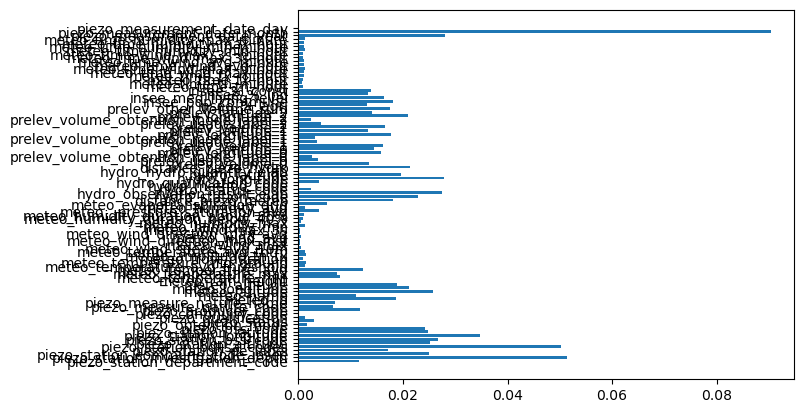

In [50]:
feature_importances = model.feature_importances_

# Visualize
import matplotlib.pyplot as plt
plt.barh(X_train_model4.columns, feature_importances)
plt.show()

The above graph makes use of the `feature_importances_` method in the RandomForestClassifier to find out the most important features for prediction. We will now use these features (`feature_importance` >0.01) to make a new RandomForestClassifier model and train it accordingly. 

In [51]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.5242429387633841


## Retrained Model with Selected Features Based on Feature Importance Being Above a Threshold

In [52]:
threshold = 0.01
selected_features = X_train_model4.columns[feature_importances > threshold]

print(f"Selected features (threshold={threshold}):", selected_features)

# Step 3: Filter Dataset for Selected Features
X_train_selected = X_train_model4[selected_features]
X_test_selected = X_test_model4[selected_features]

# Step 4: Retrain the Model
# Reinitialize and train the model
from sklearn.ensemble import RandomForestClassifier  # Use your existing model/classifier
from sklearn.metrics import accuracy_score  # Replace with regression metrics if necessary

model_retrained = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=20, class_weight='balanced')  # Use your chosen model
model_retrained.fit(X_train_selected, y_train_model4)

# Evaluate the retrained model
y_pred = model_retrained.predict(X_test_selected)
accuracy = accuracy_score(y_test_model4, y_pred)  # Replace with appropriate metric for your task
print(f"Retrained Model Accuracy: {accuracy:.4f}")

Selected features (threshold=0.01): Index(['piezo_station_department_code', 'piezo_station_investigation_depth',
       'piezo_station_commune_code_insee', 'piezo_station_pe_label',
       'piezo_station_bdlisa_codes', 'piezo_station_altitude',
       'piezo_station_bss_code', 'piezo_station_longitude',
       'piezo_station_latitude', 'piezo_bss_code', 'piezo_producer_code',
       'meteo_id', 'meteo_name', 'meteo_latitude', 'meteo_longitude',
       'meteo_altitude', 'meteo_temperature_avg', 'distance_piezo_meteo',
       'hydro_station_code', 'hydro_observation_result_elab',
       'hydro_longitude', 'hydro_latitude', 'distance_piezo_hydro',
       'prelev_volume_0', 'prelev_longitude_0', 'prelev_latitude_0',
       'prelev_volume_1', 'prelev_longitude_1', 'prelev_latitude_1',
       'prelev_volume_2', 'prelev_longitude_2', 'prelev_latitude_2',
       'prelev_other_volume_sum', 'insee_%_agri', 'insee_pop_commune',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const',
    

In [53]:
f1 = f1_score(y_test_model4, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.50363801958445


# Test Data

## Preprocessing the Test Data

In [44]:
# Identify categorical and numerical columns dynamically
categorical_columns_test = df_test.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns_test)
print("Number of Categorical Columns:", len(categorical_columns_test))
print("Numerical Columns:", numerical_columns_test)
print("Number of Numerical Columns:", len(numerical_columns_test))

Categorical Columns: ['piezo_station_department_code', 'piezo_station_update_date', 'piezo_station_department_name', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_station_commune_name', 'piezo_station_bss_id', 'piezo_bss_code', 'piezo_measurement_date', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_continuity_name', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab', 'hydro_status_label', 'hydro_method_label', 'hydro_qualification_label', 'hydro_hydro_quantity_elab', 'prelev_structure_code_0', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_structure_code_1', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_structure_code_2', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 

In [45]:
# List of redundant features to remove
redundant_features = [
    'piezo_station_department_name',      # Department name
    'piezo_station_commune_name',         # Commune name (if spatial data is used)
    'piezo_station_bss_id',               # National BSS code (keep piezo_bss_code instead)
    'piezo_station_update_date',          # Update date (less relevant than measurement date)
    'piezo_producer_name',                # Producer name (metadata)
    'piezo_continuity_name',              # Redundant with continuity_code
]

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_test.shape)

# Drop the columns from the DataFrame
df_test = df_test.drop(columns=redundant_features, axis=1)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_test.shape)

Original DataFrame shape: (611208, 135)
Cleaned DataFrame shape: (611208, 129)


In [46]:
# List of redundant features to remove
redundant_features = [
    'hydro_status_label',        # Redundant with hydro_status_code
    'hydro_method_label',        # Redundant with hydro_method_code
    'hydro_qualification_label'  # Redundant with hydro_qualification_code
]

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_test.shape)

# Drop the columns from the DataFrame
df_test = df_test.drop(columns=redundant_features, axis=1)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_test.shape)


Original DataFrame shape: (611208, 129)
Cleaned DataFrame shape: (611208, 126)


In [47]:
# List of redundant features to remove
redundant_features = [
    'prelev_commune_code_insee_0',
    'prelev_commune_code_insee_1',
    'prelev_commune_code_insee_2',
    'prelev_structure_code_0',
    'prelev_structure_code_1',
    'prelev_structure_code_2'
]

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_test.shape)

# Drop the columns from the DataFrame
df_test = df_test.drop(columns=redundant_features, axis=1)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_test.shape)

Original DataFrame shape: (611208, 126)
Cleaned DataFrame shape: (611208, 120)


In [48]:
columns_to_drop = ['meteo_DRR', 'meteo_temperature_min_50cm', 'meteo_pressure_avg',
       'meteo_pression_maxi', 'meteo_wind_speed_avg_2m', 'meteo_wind_max_2m',
       'meteo_wind_direction_max_inst_2m', 'meteo_time_wind_max_2m',
       'meteo_wetting_duration', 'meteo_sunshine_duration', 'meteo_radiation',
       'meteo_radiation_direct', 'meteo_sunshine_%', 'meteo_radiation_IR',
       'meteo_radiation_UV_max', 'meteo_cloudiness', 'meteo_cloudiness_height',
       'meteo_if_snow', 'meteo_if_fog', 'meteo_if_thunderstorm',
       'meteo_if_sleet', 'meteo_if_hail', 'meteo_if_dew', 'meteo_if_black_ice',
       'meteo_if_snow_ground', 'meteo_if_frost', 'meteo_if_smoke',
       'meteo_if_mist', 'meteo_if_lightning',
       'meteo_evapotranspiration_Monteith', 'meteo_radiation_UV',
       'meteo_snow_height', 'meteo_snow_thickness_max',
       'meteo_snow_thickness_6h']

# Display the shape of the DataFrame before
print("Original DataFrame shape:", df_test.shape)

df_test = df_test.drop(columns=columns_to_drop)

# Display the shape of the DataFrame after
print("Cleaned DataFrame shape:", df_test.shape)


Original DataFrame shape: (611208, 120)
Cleaned DataFrame shape: (611208, 86)


In [49]:
# Identify categorical and numerical columns dynamically
categorical_columns_test = df_test.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns_test)
print("Number of Categorical Columns:", len(categorical_columns_test))
print("Numerical Columns:", numerical_columns_test)
print("Number of Numerical Columns:", len(numerical_columns_test))

Categorical Columns: ['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_measurement_date', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const']
Number of Categorical Columns: 27
Numerical Columns: ['row_index', 'piezo_station_investigation_depth', 'piezo_station_altitude', 'piezo_station_longitude', 'piezo_station_latitude', 'piezo_continuity_code', 'piezo_producer_code', 'meteo_id', 'meteo_latitude', 'meteo_longitude', 'meteo

In [50]:
# Identify categorical columns by name patterns
categorical_by_name = [col for col in df_test.columns if '_code' in col or 'type' in col]

# Combine with the existing logic
categorical_columns_test = list(set(df_test.select_dtypes(include=['object', 'category']).columns.tolist() + categorical_by_name))
numerical_columns_test = [col for col in df_test.select_dtypes(include=['int64', 'float64']).columns.tolist() if col not in categorical_by_name]

print("Categorical Columns:", categorical_columns_test)
print("Number of Categorical Columns:", len(categorical_columns_test))
print("Numerical Columns:", numerical_columns_test)
print("Number of Numerical Columns:", len(numerical_columns_test))


Categorical Columns: ['prelev_usage_label_1', 'meteo_date', 'prelev_usage_label_0', 'piezo_continuity_code', 'hydro_status_code', 'piezo_station_department_code', 'hydro_station_code', 'insee_%_ind', 'insee_%_const', 'insee_med_living_level', 'hydro_observation_date_elab', 'piezo_measure_nature_code', 'piezo_station_pe_label', 'piezo_bss_code', 'prelev_volume_obtention_mode_label_2', 'piezo_measurement_date', 'piezo_qualification', 'piezo_measure_nature_name', 'prelev_volume_obtention_mode_label_1', 'prelev_volume_obtention_mode_label_0', 'hydro_method_code', 'piezo_status', 'piezo_station_commune_code_insee', 'hydro_qualification_code', 'prelev_usage_label_2', 'insee_%_agri', 'piezo_obtention_mode', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'hydro_hydro_quantity_elab', 'meteo_name', 'piezo_station_bss_code']
Number of Categorical Columns: 32
Numerical Columns: ['row_index', 'piezo_station_investigation_depth', 'piezo_station_altitude', 'piezo_station_longitude', 'piezo_stat

In [51]:
df_test_copy = df_test.copy()

## Datetime Parsing

In [52]:
potential_date_cols = df_test_copy.select_dtypes(include=['object']).columns
print(f"Potential date columns: {potential_date_cols}")

Potential date columns: Index(['piezo_station_department_code', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_bss_code', 'piezo_measurement_date',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name',
       'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_hydro_quantity_elab', 'prelev_usage_label_0',
       'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2',
       'prelev_volume_obtention_mode_label_2', 'insee_%_agri',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const'],
      dtype='object')


In [53]:
import pandas as pd

# Sample DataFrame (use your own DataFrame)
# df = pd.read_csv('your_data.csv')

# Step 1: Identify columns with object data type
object_columns = df_test_copy.select_dtypes(include=['object']).columns

# Step 2: Filter columns that can be converted to datetime
date_columns = []

for col in object_columns:
    try:
        # Attempt to convert the column to datetime
        pd.to_datetime(df_test_copy[col], errors='raise')
        date_columns.append(col)
    except (ValueError, TypeError):
        # If conversion fails, it's not a date column
        pass

# Display identified date columns
print(f"Identified date columns: {date_columns}")


Identified date columns: ['piezo_measurement_date', 'meteo_date', 'hydro_observation_date_elab']


In [54]:
time_columns =  [
    'meteo_time_tn',
    'meteo_time_tx',
    'meteo_time_wind_max',
    'meteo_time_wind_avg',
    'meteo_time_wind_max_3s',
    'meteo_time_humidity_min',
    'meteo_time_humidity_max'
]

# Function to extract hours and minutes and convert to total minutes and seconds
def convert_time_columns(df, time_columns):
    for col in time_columns:
        df[col + '_hour'] = (df[col] // 100).astype(object)   # Extract the hour
        df[col + '_minute'] = (df[col] % 100).astype(object)   # Extract the minute

        # Handle invalid minutes (> 59) and hours (> 23)
        df.loc[df[col + '_minute'] >= 60, col + '_minute'] = 0
        df.loc[df[col + '_hour'] >= 24, col + '_hour'] = 0
        
    return df

# Apply the function
df_test_copy = convert_time_columns(df_test_copy, time_columns)

df_test_copy.drop(columns=time_columns, inplace=True)

# Display the processed DataFrame
df_test_copy.head()

,row_index,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,...,meteo_time_wind_max_hour,meteo_time_wind_max_minute,meteo_time_wind_avg_hour,meteo_time_wind_avg_minute,meteo_time_wind_max_3s_hour,meteo_time_wind_max_3s_minute,meteo_time_humidity_min_hour,meteo_time_humidity_min_minute,meteo_time_humidity_max_hour,meteo_time_humidity_max_minute
0,2331795,01,20.00,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,5.748241,45.828148,...,22,57,23,1,22,57,15,59,0,1
1,2331796,01,35.60,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,5.356637,46.028102,...,17,17,NaN,NaN,NaN,NaN,15,6,1,15
2,2331797,01,35.22,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,5.220795,45.895734,...,NaN,NaN,NaN,NaN,NaN,NaN,14,39,4,31
3,2331798,01,34.20,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,5.948977,46.201180,...,8,23,10,44,8,41,16,14,2,34
4,2331799,01,37.30,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,5.313353,46.136402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Convert identified date columns to datetime format
for col in date_columns:
    df_test_copy[col] = pd.to_datetime(df_test_copy[col], errors='coerce')
    # Extract date features if needed
    df_test_copy[f'{col}_year'] = df_test_copy[col].dt.year.astype('object')
    df_test_copy[f'{col}_month'] = df_test_copy[col].dt.month.astype('object')
    df_test_copy[f'{col}_day'] = df_test_copy[col].dt.day.astype('object')

# Drop original datetime columns if only extracted features are needed
df_test_copy.drop(columns=date_columns, inplace=True)

# Identify all categorical columns (including datetime components)
categorical_columns_test = df_test_copy.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", categorical_columns_test)
print("Number of Categorical Columns:", len(categorical_columns_test))


Categorical Columns: Index(['piezo_station_department_code', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode',
       'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code',
       'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code',
       'hydro_hydro_quantity_elab', 'prelev_usage_label_0',
       'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2',
       'prelev_volume_obtention_mode_label_2', 'insee_%_agri',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const',
       'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour',
       'meteo_time_tx_minute', 'meteo_time_wind_max_hour',
       'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour',
       'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour',
       'meteo_time_wi

In [56]:
# Drop unnecessary Columns
X_test_ids = df_test_copy['row_index']
print(X_test_ids.shape)
variables_to_drop = [
    'row_index'
]

df_test_copy.drop(columns=variables_to_drop, inplace=True)

numerical_columns_test = df_test_copy.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:", numerical_columns_test)
print("Number of Numerical Columns:", len(numerical_columns_test))

print("Categorical Columns:", categorical_columns_test)
print("Number of Categorical Columns:", len(categorical_columns_test))

(611208,)
Numerical Columns: Index(['piezo_station_investigation_depth', 'piezo_station_altitude',
       'piezo_station_longitude', 'piezo_station_latitude',
       'piezo_continuity_code', 'piezo_producer_code', 'meteo_id',
       'meteo_latitude', 'meteo_longitude', 'meteo_altitude',
       'meteo_rain_height', 'meteo_temperature_min', 'meteo_temperature_max',
       'meteo_temperature_avg', 'meteo_temperature_avg_threshold',
       'meteo_temperature_min_ground', 'meteo_frost_duration',
       'meteo_amplitude_tn_tx', 'meteo_temperature_avg_tntm',
       'meteo_wind_speed_avg_10m', 'meteo_wind_max',
       'meteo_wind_direction_max_inst', 'meteo_wind_avg',
       'meteo_wind_direction_max_avg', 'meteo_wind_max_3s',
       'meteo_humidity_min', 'meteo_humidity_max',
       'meteo_humidity_duration_below_40%',
       'meteo_humidity_duration_above_80%', 'meteo__pressure_saturation_avg',
       'meteo_humidity_avg', 'meteo_evapotranspiration_grid',
       'distance_piezo_meteo', 'hydr

## Label Encoding for Categorical Features

In [57]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns_test:
    le = LabelEncoder()
    df_test_copy[col] = le.fit_transform(df_test_copy[col].astype(str))
    label_encoders[col] = le

In [58]:
df_test_copy.head()

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,meteo_time_humidity_max_minute,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day,meteo_date_year,meteo_date_month,meteo_date_day,hydro_observation_date_elab_year,hydro_observation_date_elab_month,hydro_observation_date_elab_day
0,0,20.00,3,1520,737,232.00,1548,5.748241,45.828148,1548,...,1,0,0,0,0,0,0,0,0,0
1,0,35.60,8,1512,752,247.25,1453,5.356637,46.028102,1453,...,7,0,0,0,0,0,0,0,0,0
2,0,35.22,5,1500,14,218.77,1544,5.220795,45.895734,1544,...,25,0,0,0,0,0,0,0,0,0
3,0,34.20,6,1513,579,499.85,1404,5.948977,46.201180,1404,...,28,0,0,0,0,0,0,0,0,0
4,0,37.30,15,600,563,260.00,1403,5.313353,46.136402,1403,...,60,0,0,0,0,0,0,0,0,0


In [59]:
df_test_copy.head()

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,meteo_time_humidity_max_minute,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day,meteo_date_year,meteo_date_month,meteo_date_day,hydro_observation_date_elab_year,hydro_observation_date_elab_month,hydro_observation_date_elab_day
0,0,20.00,3,1520,737,232.00,1548,5.748241,45.828148,1548,...,1,0,0,0,0,0,0,0,0,0
1,0,35.60,8,1512,752,247.25,1453,5.356637,46.028102,1453,...,7,0,0,0,0,0,0,0,0,0
2,0,35.22,5,1500,14,218.77,1544,5.220795,45.895734,1544,...,25,0,0,0,0,0,0,0,0,0
3,0,34.20,6,1513,579,499.85,1404,5.948977,46.201180,1404,...,28,0,0,0,0,0,0,0,0,0
4,0,37.30,15,600,563,260.00,1403,5.313353,46.136402,1403,...,60,0,0,0,0,0,0,0,0,0


In [60]:
print(categorical_columns_test)

Index(['piezo_station_department_code', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode',
       'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code',
       'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code',
       'hydro_hydro_quantity_elab', 'prelev_usage_label_0',
       'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2',
       'prelev_volume_obtention_mode_label_2', 'insee_%_agri',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const',
       'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour',
       'meteo_time_tx_minute', 'meteo_time_wind_max_hour',
       'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour',
       'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour',
       'meteo_time_wind_max_3s_minute', 'm

In [61]:
df_test_copy.head()

,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_longitude,piezo_station_latitude,piezo_bss_code,...,meteo_time_humidity_max_minute,piezo_measurement_date_year,piezo_measurement_date_month,piezo_measurement_date_day,meteo_date_year,meteo_date_month,meteo_date_day,hydro_observation_date_elab_year,hydro_observation_date_elab_month,hydro_observation_date_elab_day
0,0,20.00,3,1520,737,232.00,1548,5.748241,45.828148,1548,...,1,0,0,0,0,0,0,0,0,0
1,0,35.60,8,1512,752,247.25,1453,5.356637,46.028102,1453,...,7,0,0,0,0,0,0,0,0,0
2,0,35.22,5,1500,14,218.77,1544,5.220795,45.895734,1544,...,25,0,0,0,0,0,0,0,0,0
3,0,34.20,6,1513,579,499.85,1404,5.948977,46.201180,1404,...,28,0,0,0,0,0,0,0,0,0
4,0,37.30,15,600,563,260.00,1403,5.313353,46.136402,1403,...,60,0,0,0,0,0,0,0,0,0


## Imputing Missing Values in the Test Set Using KNNImputer and IterativeImputer

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
import pandas as pd

numerical_columns_test = list(numerical_columns_test)
categorical_columns_test = columns_for_test
print(categorical_columns_test)

if numerical_columns_test and iterative_imputer is not None:
    df_test_copy[numerical_columns_test] = iterative_imputer.transform(df_test_copy[numerical_columns_test])
    
# Impute categorical columns using KNNImputer
if categorical_columns_test and knn_imputer is not None:
    df_test_copy[categorical_columns_test] = knn_imputer.transform(df_test_copy[categorical_columns_test])
        
    # Round and convert back to integers (as they are label-encoded)
    df_test_copy[categorical_columns_test] = df_test_copy[categorical_columns_test].round().astype(int)
        
imputed_df_test = df_test_copy.copy()

missing_values = imputed_df_test.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute', 'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour', 'meteo_time_wind_max_3s_minute', 'meteo_time_humidity_min_hour', 'meteo_time_humidity_min_minute', 'meteo_time_humidity_max_hour', 'meteo_t

In [63]:
df_test_copy = imputed_df_test.copy()

## Removing Redundant Date Columns as Done Previously for the Train Data

In [64]:
columns_to_drop = ['meteo_date_day', 'meteo_date_month', 'meteo_date_year', 'hydro_observation_date_elab_year',
       'hydro_observation_date_elab_month', 'hydro_observation_date_elab_day']
df_test_copy.drop(columns = columns_to_drop, axis=1, inplace = True)
categorical_columns_test = [col for col in categorical_columns_test if col not in columns_to_drop]

print("Updated Categorical Columns:", categorical_columns_test)

Updated Categorical Columns: ['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute', 'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour', 'meteo_time_wind_max_3s_minute', 'meteo_time_humidity_min_hour', 'meteo_time_humidity_min_minute', 'meteo_time

In [65]:
df_test = df_test_copy.copy()

## Scaling Numerical Features Using Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df_test[numerical_columns_test] = scaler.fit_transform(df_test[numerical_columns_test])

In [67]:
# Display the cleaned and balanced dataset information
print("Final Dataset Shape:", df_test.shape)
print("Categorical Columns:", categorical_columns_test)
print("Numerical Columns:", numerical_columns_test)

Final Dataset Shape: (611208, 92)
Categorical Columns: ['piezo_station_department_code', 'piezo_station_commune_code_insee', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_station_bss_code', 'piezo_bss_code', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name', 'hydro_station_code', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const', 'meteo_time_tn_hour', 'meteo_time_tn_minute', 'meteo_time_tx_hour', 'meteo_time_tx_minute', 'meteo_time_wind_max_hour', 'meteo_time_wind_max_minute', 'meteo_time_wind_avg_hour', 'meteo_time_wind_avg_minute', 'meteo_time_wind_max_3s_hour', 'meteo_time_wind_max_3s_minute', 'meteo_time_humidity_min_hour', 'meteo_time_humidit

# A: Using RandomForestClassifier on Selected Features

In [79]:
# Step 1: Define the mapping from encoded labels to original class names
label_mapping = {
    0: 'Average',
    1: 'High',
    2: 'Low',
    3: 'Very High',
    4: 'Very Low'
}
df_test_new = df_test[selected_features].copy()

# Step 2: Predict on the test dataset
y_test_encoded = model_retrained.predict(df_test_new)  # These are your numeric predictions

# Step 3: Map the encoded predictions back to original labels
y_test_original = [label_mapping[label] for label in y_test_encoded]

# Step 4: Save predictions to a CSV file
import pandas as pd

# Assuming 'test_ids' contains the identifiers for the test data
output = pd.DataFrame({'row_index': X_test_ids, 'piezo_groundwater_level_category': y_test_original})

# Save to CSV
output.to_csv('predictions6.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


# B: Using RandomForestClassifier on All Features of the Preprocesses Training Set

In [217]:
# Step 1: Define the mapping from encoded labels to original class names
label_mapping = {
    0: 'Average',
    1: 'High',
    2: 'Low',
    3: 'Very High',
    4: 'Very Low'
}

# Step 2: Predict on the test dataset
y_test_encoded = model.predict(df_test)  # These are your numeric predictions

# Step 3: Map the encoded predictions back to original labels
y_test_original = [label_mapping[label] for label in y_test_encoded]

# Step 4: Save predictions to a CSV file
import pandas as pd

# Assuming 'test_ids' contains the identifiers for the test data
output = pd.DataFrame({'row_index': X_test_ids, 'piezo_groundwater_level_category': y_test_original})

# Save to CSV
output.to_csv('predictions2.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


# C: Using XGBoost

In [83]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert the datasets to DMatrix format for efficiency
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Use 'multi:softprob' for probabilities
    'num_class': 5,  # Number of unique classes
    'max_depth': 14,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'subsample': 0.8,
    'lambda': 1e-3,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss'
}

# Train the model
model_new = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,  # Number of boosting rounds
    evals=[(dtest, 'test')],  # Evaluation on test set
    early_stopping_rounds=10  # Stop if no improvement after 10 rounds
)

# Make predictions
y_pred = model_new.predict(dtest)
y_pred = y_pred.astype(int)  # Ensure predictions are integers

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("F1 Score:", f1)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [07:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	test-mlogloss:1.53415
[1]	test-mlogloss:1.47265
[2]	test-mlogloss:1.41601
[3]	test-mlogloss:1.36138
[4]	test-mlogloss:1.31086
[5]	test-mlogloss:1.26618
[6]	test-mlogloss:1.22196
[7]	test-mlogloss:1.18218
[8]	test-mlogloss:1.14475
[9]	test-mlogloss:1.11256
[10]	test-mlogloss:1.08056
[11]	test-mlogloss:1.05044
[12]	test-mlogloss:1.02137
[13]	test-mlogloss:0.99450
[14]	test-mlogloss:0.97214
[15]	test-mlogloss:0.94790
[16]	test-mlogloss:0.92665
[17]	test-mlogloss:0.90555
[18]	test-mlogloss:0.88609
[19]	test-mlogloss:0.86880
[20]	test-mlogloss:0.85098
[21]	test-mlogloss:0.83601
[22]	test-mlogloss:0.81933
[23]	test-mlogloss:0.80412
[24]	test-mlogloss:0.78832
[25]	test-mlogloss:0.77160
[26]	test-mlogloss:0.75814
[27]	test-mlogloss:0.74470
[28]	test-mlogloss:0.73214
[29]	test-mlogloss:0.72062
[30]	test-mlogloss:0.70789
[31]	test-mlogloss:0.69703
[32]	test-mlogloss:0.68509
[33]	test-mlogloss:0.67531
[34]	test-mlogloss:0.66582
[35]	test-mlogloss:0.65566
[36]	test-mlogloss:0.64649
[37]	test-m

In [ ]:
# Step 1: Define the mapping from encoded labels to original class names
label_mapping = {
    0: 'Average',
    1: 'High',
    2: 'Low',
    3: 'Very High',
    4: 'Very Low'
}
df_test_n = xgb.DMatrix(df_test, label=y_test)
# Step 2: Predict on the test dataset
y_test_encoded = model_new.predict(df_test)  # These are your numeric predictions

# Step 3: Map the encoded predictions back to original labels
y_test_original = [label_mapping[label] for label in y_test_encoded]

# Step 4: Save predictions to a CSV file
import pandas as pd

# Assuming 'test_ids' contains the identifiers for the test data
output = pd.DataFrame({'row_index': X_test_ids, 'piezo_groundwater_level_category': y_test_original})

# Save to CSV
output.to_csv('predictions7.csv', index=False)

print("Predictions saved to 'predictions7.csv'")

## D: HistGradientBoosting

In [69]:
# Install scikit-learn if not already installed
!pip install scikit-learn

# Import the necessary libraries
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the HistGradientBoostingClassifier with recommended hyperparameters
model_hgb = HistGradientBoostingClassifier(
    max_iter=1000,  # Number of boosting iterations (trees)
    learning_rate=0.1,  # Learning rate
    max_depth=6,  # Depth of each tree
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_leaf_nodes=31,  # Maximum number of leaf nodes
    l2_regularization=1.0,  # L2 regularization
    random_state=42,  # For reproducibility
    early_stopping=50,  # Stop training if no improvement for 50 rounds
    validation_fraction=0.1,  # Fraction of training data used for early stopping
    n_iter_no_change=10,  # Number of iterations with no improvement before stopping
)

# Fit the model using training data
model_hgb.fit(X_train, y_train)

# Make predictions
y_pred = model_hgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\ayraa\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Accuracy: 76.68%
F1 Score: 0.77


In [70]:
# Step 1: Define the mapping from encoded labels to original class names
label_mapping = {
    0: 'Average',
    1: 'High',
    2: 'Low',
    3: 'Very High',
    4: 'Very Low'
}

# Step 2: Predict on the test dataset
y_test_encoded = model_hgb.predict(df_test)  # These are your numeric predictions

# Step 3: Map the encoded predictions back to original labels
y_test_original = [label_mapping[label] for label in y_test_encoded]

# Step 4: Save predictions to a CSV file
import pandas as pd

# Assuming 'test_ids' contains the identifiers for the test data
output = pd.DataFrame({'row_index': X_test_ids, 'piezo_groundwater_level_category': y_test_original})

# Save to CSV
output.to_csv('predictions10.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


## E: CatBoost

In [71]:
# Install CatBoost if not already installed
!pip install catboost

# Import the necessary libraries
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, f1_score

# Define the CatBoost model with recommended hyperparameters
model_catboost = CatBoostClassifier(
    iterations=1000,  # Number of trees (boosting rounds)
    learning_rate=0.1,  # Learning rate
    depth=6,  # Depth of each tree
    l2_leaf_reg=1,  # L2 regularization
    loss_function='MultiClass',  # Multi-class classification task
    eval_metric='MultiClass',
    random_state=42,  # For reproducibility
    verbose=100,  # Print progress every 100 iterations
    early_stopping_rounds=50  # Stop early if no improvement after 50 rounds
)

# Fit the model using training data
model_catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True  # Automatically use the best model found during training
)

# Make predictions
y_pred = model_catboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")

   --------------------------------------- 101.8/101.8 MB 19.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


0:	learn: 1.5943877	test: 1.5944558	best: 1.5944558 (0)	total: 1.9s	remaining: 31m 42s
100:	learn: 1.3533997	test: 1.3545159	best: 1.3545159 (100)	total: 2m 40s	remaining: 23m 52s
200:	learn: 1.2625956	test: 1.2645547	best: 1.2645547 (200)	total: 5m 8s	remaining: 20m 24s
300:	learn: 1.1972597	test: 1.1996544	best: 1.1996544 (300)	total: 7m 39s	remaining: 17m 46s
400:	learn: 1.1471792	test: 1.1501097	best: 1.1501097 (400)	total: 10m	remaining: 14m 57s
500:	learn: 1.1061014	test: 1.1095744	best: 1.1095744 (500)	total: 12m 26s	remaining: 12m 23s
600:	learn: 1.0715683	test: 1.0755792	best: 1.0755792 (600)	total: 14m 50s	remaining: 9m 51s
700:	learn: 1.0414277	test: 1.0459234	best: 1.0459234 (700)	total: 17m 15s	remaining: 7m 21s
800:	learn: 1.0148509	test: 1.0198502	best: 1.0198502 (800)	total: 19m 44s	remaining: 4m 54s
900:	learn: 0.9908148	test: 0.9962269	best: 0.9962269 (900)	total: 22m 16s	remaining: 2m 26s
999:	learn: 0.9697067	test: 0.9754440	best: 0.9754440 (999)	total: 24m 46s	rema

In [ ]:
# Step 1: Define the mapping from encoded labels to original class names
label_mapping = {
    0: 'Average',
    1: 'High',
    2: 'Low',
    3: 'Very High',
    4: 'Very Low'
}

# Step 2: Predict on the test dataset
y_test_encoded = model_catboost.predict(df_test)  # These are your numeric predictions

# Flatten the predictions to ensure a 1D array
y_test_encoded = np.ravel(y_test_encoded)

# Step 3: Map the encoded predictions back to original labels
y_test_original = [label_mapping[label] for label in y_test_encoded]

# Step 4: Save predictions to a CSV file
import pandas as pd

# Assuming 'test_ids' contains the identifiers for the test data
output = pd.DataFrame({'row_index': X_test_ids, 'piezo_groundwater_level_category': y_test_original})

# Save to CSV
output.to_csv('predictions91.csv', index=False)

print("Predictions saved to 'predictions9.csv'")

## Conclusion

The hackathon posed an intriguing challenge of predicting groundwater level categories during summer months in France. Despite the complexity of the dataset, characterized by a large size (3 million data points) and extensive missing values in both numerical and categorical features, our team successfully navigated the data preprocessing and modeling objective to derive meaningful predictions. 

Initially, we handled missing data using advanced imputation techniques: **KNN Imputer** for categorical variables and **Iterative Imputer** for numerical variables. This step was computationally intensive due to the dataset's scale but ensured that the data was appropriately completed for further analysis. Following this, redundant features were removed to streamline the feature set, categorical variables were label encoded, and numerical variables were standardized using **Standard Scaling**. These preprocessing steps were critical in preparing the dataset for the machine learning model.

For model development, we began with a baseline **RandomForestClassifier** and utilized its feature importance method to identify the most relevant features, filtering them based on a threshold of 0.01. This feature selection approach improved computational efficiency and interpretability, forming the basis for our final model. Although the validation accuracy of RandomForest was high, initial evaluations on the test set revealed a performance gap, suggesting overfitting or insufficient generalization.

Subsequently, we experimented with advanced models, including **Neural Networks** with numerous hidden layers, **Batch Normalization**, **dropout regularization**, and **ReLU activation functions** to capture non-linear relationships. However, these deep learning models did not yield better performance than RandomForest, possibly due to the dataset characteristics or insufficient hyperparameter tuning. **Boosting algorithms**, such as **XGBoost**, **CatBoost**, and **HistGradientBoost**, were also employed. While XGBoost showed limited improvement, CatBoost and HistGradientBoost performed comparably to RandomForest with selective features.

Ultimately, the **RandomForestClassifier with selected features** emerged as the best-performing model, balancing accuracy and computational efficiency. Time constraints and the dataset's scale limited our ability to implement advanced techniques like **k-fold cross-validation** and **Grid Search CV** for hyperparameter optimization, which could have further improved results.


## Future Insights and Improvements

Looking forward, several strategies can be implemented to enhance the model's performance and address the limitations encountered during the hackathon:

1. **Optimizing Missing Data Imputation**:
   - While KNN Imputer and Iterative Imputer were effective, their high computational cost made them impractical for very large datasets. Future efforts could explore scalable imputation techniques, such as matrix factorization or deep learning-based imputers, to handle missing values more efficiently.

2. **Feature Engineering and Selection**:
   - Advanced feature engineering techniques, such as creating interaction terms, polynomial features, or domain-specific transformations, could improve the model's ability to capture complex relationships.
   - Instead of a static threshold for feature importance, automated feature selection methods like **Recursive Feature Elimination (RFE)** or **SHAP values** could provide a more granular selection process.

3. **Hyperparameter Tuning**:
   - **Grid Search CV** and **Random Search CV** could be implemented with parallel processing or on smaller subsets of data to identify optimal hyperparameters for the models.

4. **Addressing Overfitting**:
   - Techniques like **cross-validation**, **ensemble averaging**, or adding constraints to tree-based models (e.g., maximum depth, minimum leaf samples) could mitigate overfitting and improve generalization to unseen data.

5. **Experimenting with Ensemble Models**:
   - Combining the strengths of different algorithms through **stacking** or **blending** could yield more robust predictions. For example, using RandomForest, CatBoost, and HistGradientBoost in a meta-model framework.

6. **Improving Neural Network Performance**:
   - Exploring architectures better suited for structured data could improve neural network performance.
   - Incorporating regularization techniques like **weight decay**, **drop connect**, or **adaptive optimizers** might enhance generalization.

7. **Time-Series Feature Considerations**:
   - Reframing the problem as a time-series forecasting task could enrich our analysis, especially if temporal data is robust and detailed. Our classification-focused implementation yielded average results so exploring the temporal aspect of groundwater levels could provide additional predictive power and insights, making it a valuable avenue for future work. This dual approach would offer a more comprehensive understanding of the underlying dynamics, ultimately aiding more accurate and actionable predictions.

## Evaluation of Code (CatBoost Model)

In [72]:
import pandas as pd
import numpy as np

random_indices = np.random.choice(df_test.index, size=10000, replace=False)
df_test_sample = df_test.loc[random_indices]

y_test_encoded_sample = model_catboost.predict(df_test_sample)  # Numeric predictions

y_test_encoded_sample = np.ravel(y_test_encoded_sample)

label_mapping = {
    0: 'Average',
    1: 'High',
    2: 'Low',
    3: 'Very High',
    4: 'Very Low'
}

y_test_original_sample = [label_mapping[label] for label in y_test_encoded_sample]

output_sample = pd.DataFrame({
    'row_index': random_indices, 
    'piezo_groundwater_level_category': y_test_original_sample
})

output_sample.to_csv('predictions_sampled.csv', index=False)

print("Predictions for 10,000 random datapoints saved to 'predictions_sampled.csv'")


Predictions for 10,000 random datapoints saved to 'predictions_sampled.csv'
